<a href="https://colab.research.google.com/github/abrahamcab555/Tec/blob/main/Proyecto_Avance6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
DIR = "/content/drive/MyDrive/"
os.chdir(DIR)

In [10]:
d_2023 = pd.read_csv('datos_2023.csv', delimiter = ",")
d_2024 = pd.read_csv('datos_2024.csv', delimiter = ",")
d_2022 = pd.read_csv('datos_2022.csv', delimiter = ",")

In [5]:
d_2023["target"].value_counts()

target
0    2642053
1     119993
Name: count, dtype: int64

In [11]:
d_2023=d_2023[d_2023["target"]==1]
d_2023["target"].value_counts()
d_2022=d_2022[d_2022["target"]==1]


In [12]:
d_2024["target"].value_counts(normalize=1)

target
0    0.957927
1    0.042073
Name: proportion, dtype: float64

In [14]:
# Eliminar el % de valores de la clase mayoritaria del 2024

# Fijar semilla para reproducibilidad
np.random.seed(42)


subset_target_0 = d_2024[d_2024["target"] == 0]
uuid_mes_unicos = subset_target_0[["uuid_rec", "mes"]].drop_duplicates()

# Seleccionar aleatoriamente el 50% de estas combinaciones
uuid_mes_a_eliminar = uuid_mes_unicos.sample(frac=0.45, random_state=42)

# Fusionar con el DataFrame original para identificar los registros a eliminar
d_2024_filtrado = d_2024.merge(uuid_mes_a_eliminar, on=["uuid_rec", "mes"], how="left", indicator=True)

# Conservar solo los registros que NO fueron marcados para eliminación
d_2024_filtrado = d_2024_filtrado[d_2024_filtrado["_merge"] == "left_only"].drop(columns=["_merge"])


print(f"Registros originales: {len(d_2024)}")
print(f"Registros después de eliminación: {len(d_2024_filtrado)}")

d_2024 = d_2024_filtrado

Registros originales: 1055496
Registros después de eliminación: 615647


In [15]:
d_2024["target"].value_counts(normalize=1)

target
0    0.873216
1    0.126784
Name: proportion, dtype: float64

In [16]:
print("Tamaño base 2022 : " + str(len(d_2022)))
print("Tamaño base 2023 : " + str(len(d_2023)))
print("Tamaño base 2024 : " + str(len(d_2024)))

Tamaño base 2022 : 115267
Tamaño base 2023 : 119993
Tamaño base 2024 : 615647


In [17]:
datos_df = pd.concat([d_2022,d_2023, d_2024], ignore_index=True)

print("Tamaño base 2024 : " + str(len(datos_df)))

Tamaño base 2024 : 850907


In [18]:

datos_df["target"].value_counts(normalize=1)

target
0    0.631788
1    0.368212
Name: proportion, dtype: float64

In [19]:
 datos_df.head()

em_segmento em_tipo_gob genero      uuid_rec  target mes_informacion  \
0         PYME         NaN      M  fee79fef-9a2       1      2022-01-01   
1  CORPORATIVA         NaN      M  fe394057-645       1      2022-01-01   
2         PYME         NaN      M  fbcdd913-ec8       1      2022-01-01   
3         PYME         NaN      M  f9e9ca3b-643       1      2022-01-01   
4         PYME         NaN      M  fad4cfb2-037       1      2022-01-01   

   f_con_credito  mes  creditos  cte_creds_prom_3ant  ...  \
0              0    1         0                  0.0  ...   
1              1    1         1                  1.0  ...   
2              1    1         1                  1.0  ...   
3              0    1         0                  0.0  ...   
4              0    1         0                  0.0  ...   

   em_empl_cred_prom_6m  em_sdo_creds_emp  em_empl_saldcredt_prom_3m  \
0                 6.333          72203.56                  74036.383   
1               244.500        2496874.94                2894989.183   
2                 7.167          36449.71                  33464.413   
3                 7.000          60283.53                  60445.157   
4                29.667         137568.42                 129316.500   

   em_empl_saldcredt_prom_6m  em_vencido_emp  em_empl_ven_prom_3m  \
0                  74066.122             0.0                  0.0   
1                2997640.285             0.0                  0.0   
2                  34390.750             0.0                  0.0   
3                  80258.880             0.0                  0.0   
4                 119520.798             0.0                  0.0   

   em_empl_ven_prom_6m  em_castigos_emp  em_empl_cast_3m  em_empl_cast_6m  
0                  0.0              0.0              0.0             0.00  
1                  0.0              0.0              0.0             0.00  
2                  0.0              0.0              0.0             0.00  
3                  0.0              0.0              0.0             0.00  
4                  0.0              0.0              0.0           363.96  

[5 rows x 50 columns]

In [20]:
# Se crean nuevas variables para medir cambios de los datos observados vs los promedios de los últimos 3 o 6 meses
# Diccionario con la estructura variable_resultado: (numerador, denominador)
variables = {
    "tasa_creds_3m": ("creditos", "cte_creds_prom_3ant"),
    "tasa_disp_3m": ("dispersion", "cte_dip_prom_3m"),
    "tasa_cap_3m": ("sdo_prom_capt", "sdo_cap_prom_3ant"),
    "tasa_rot_3m": ("em_rotacion_6m", "em_r6m_prom_3m"),
    "tasa_em_empl_3m": ("em_empleados", "em_empl_prom_3m"),
    "tasa_em_disp_3m": ("em_dispersion_empleados", "em_disp_prom_3m"),
    "tasa_penetracion_3m": ("em_porc_pen", "em_porc_pen_prom_3m"),
    "tasa_em_disp_prom_3m": ("em_disp_emp_prom", "em_disp_empl_prom_3m"),
    "tasa_em_creds_3m": ("em_num_creds_emp", "em_empl_cred_prom_3m"),
    "tasa_em_sdo_creds_3m": ("em_sdo_creds_emp", "em_empl_saldcredt_prom_3m"),
    "tasa_vencido_em_3m": ("em_vencido_emp", "em_empl_ven_prom_3m"),
    "tasa_cast_em_3m": ("em_castigos_emp", "em_empl_cast_3m"),
    "tasa_disper_vs_inicial": ("dispersion", "dispersion_inicial"),
    "cap3m_disp3m": ("sdo_cap_prom_3ant", "cte_dip_prom_3m"),
    "cap6m_disp6m": ("sdo_cap_prom_6ant", "cte_dip_prom_6m"),
    "catp_disper": ("sdo_prom_capt", "dispersion"),
    "disp6m_dispinicial": ("cte_dip_prom_6m", "dispersion_inicial"),
    "disp3m_dispinicial": ("cte_dip_prom_3m", "dispersion_inicial"),
    "tasa_creds_6m": ("creditos", "cte_creds_prom_6ant"),
    "tasa_disp_6m": ("dispersion", "cte_dip_prom_6m"),
    "tasa_cap_6m": ("sdo_prom_capt", "sdo_cap_prom_6ant"),
    "tasa_rot_6m": ("em_rotacion_6m", "em_r6m_prom_6m"),
    "tasa_em_empl_6m": ("em_empleados", "em_empl_prom_6m"),
    "tasa_em_disp_6m": ("em_dispersion_empleados", "em_disp_prom_6m"),
    "tasa_penetracion_6m": ("em_porc_pen", "em_porc_pen_prom_6m"),
    "tasa_em_disp_prom_6m": ("em_disp_emp_prom", "em_disp_empl_prom_6m"),
    "tasa_em_creds_6m": ("em_num_creds_emp", "em_empl_cred_prom_6m"),
    "tasa_em_sdo_creds_6m": ("em_sdo_creds_emp", "em_empl_saldcredt_prom_6m"),
    "tasa_vencido_em_6m": ("em_vencido_emp", "em_empl_ven_prom_6m"),
    "tasa_cast_em_6m": ("em_castigos_emp", "em_empl_cast_6m"),

     "disper_edad_ingreso": ("dispersion", "edad_ingreso"),
    "disper_edad_mes": ("dispersion", "edad_perdida_emp")

}

# Crear las nuevas variables con tratamiento de división por cero
for nueva_var, (num, denom) in variables.items():
    datos_df[nueva_var] = datos_df[num] / datos_df[denom]
    datos_df[nueva_var] = datos_df[nueva_var].where(datos_df[denom] != 0, 0)  # Si el denominador es 0, asigna 0

# Mostrar el DataFrame con las nuevas variables
print(datos_df.head())

   em_segmento em_tipo_gob genero      uuid_rec  target mes_informacion  \
0         PYME         NaN      M  fee79fef-9a2       1      2022-01-01   
1  CORPORATIVA         NaN      M  fe394057-645       1      2022-01-01   
2         PYME         NaN      M  fbcdd913-ec8       1      2022-01-01   
3         PYME         NaN      M  f9e9ca3b-643       1      2022-01-01   
4         PYME         NaN      M  fad4cfb2-037       1      2022-01-01   

   f_con_credito  mes  creditos  cte_creds_prom_3ant  ...  tasa_em_empl_6m  \
0              0    1         0                  0.0  ...         1.000000   
1              1    1         1                  1.0  ...         0.968707   
2              1    1         1                  1.0  ...         0.970617   
3              0    1         0                  0.0  ...         0.895522   
4              0    1         0                  0.0  ...         0.982180   

   tasa_em_disp_6m  tasa_penetracion_6m  tasa_em_disp_prom_6m  \
0         0.850

## **EDA**

**El Análisis Exploratorio de Datos** (EDA, por sus siglas en inglés) es el proceso inicial en la ciencia de datos que permite comprender la estructura, la calidad y las relaciones dentro del conjunto de datos antes de aplicar modelos de machine learning o técnicas avanzadas.

In [21]:
# Dimensiones del dataset
print(f"Filas: {datos_df.shape[0]}, Columnas: {datos_df.shape[1]}")


Filas: 850907, Columnas: 82


In [22]:
# Tipos de datos y valores nulos
print(datos_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850907 entries, 0 to 850906
Data columns (total 82 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   em_segmento                850107 non-null  object 
 1   em_tipo_gob                252755 non-null  object 
 2   genero                     850907 non-null  object 
 3   uuid_rec                   850907 non-null  object 
 4   target                     850907 non-null  int64  
 5   mes_informacion            850907 non-null  object 
 6   f_con_credito              850907 non-null  int64  
 7   mes                        850907 non-null  int64  
 8   creditos                   850907 non-null  int64  
 9   cte_creds_prom_3ant        850907 non-null  float64
 10  cte_creds_prom_6ant        850907 non-null  float64
 11  dispersion_inicial         850907 non-null  float64
 12  dispersion                 850907 non-null  float64
 13  cte_dip_prom_3m            85

In [23]:
# Renombrar variable de edad
datos_df.rename(columns={'edad_perdida_emp': 'edad_observacion'}, inplace=True)

In [24]:
#Estadística descriptiva
df_describe = datos_df.describe().T
pd.options.display.float_format = '{:.2f}'.format
df_describe

count   mean    std   min    25%    50%    75%  \
target               850907.00   0.37   0.48  0.00   0.00   0.00   1.00   
f_con_credito        850907.00   0.14   0.35  0.00   0.00   0.00   0.00   
mes                  850907.00   5.02   2.77  1.00   3.00   5.00   7.00   
creditos             850907.00   0.17   0.46  0.00   0.00   0.00   0.00   
cte_creds_prom_3ant  850907.00   0.17   0.45  0.00   0.00   0.00   0.00   
...                        ...    ...    ...   ...    ...    ...    ...   
tasa_em_sdo_creds_6m 850907.00   0.94   0.47  0.00   0.92   1.01   1.08   
tasa_vencido_em_6m   850907.00   0.18   0.44  0.00   0.00   0.00   0.00   
tasa_cast_em_6m      850907.00   0.04   0.26 -0.13   0.00   0.00   0.00   
disper_edad_ingreso  850907.00 363.69 607.38  0.00 171.52 278.92 440.14   
disper_edad_mes      850907.00 337.08 563.63  0.00 162.28 261.90 408.87   

                           max  
target                    1.00  
f_con_credito             1.00  
mes                      12.00  
creditos                 11.00  
cte_creds_prom_3ant      11.67  
...                        ...  
tasa_em_sdo_creds_6m      5.73  
tasa_vencido_em_6m        3.66  
tasa_cast_em_6m           4.69  
disper_edad_ingreso  235946.55  
disper_edad_mes      220474.64  

[77 rows x 8 columns]

In [25]:
datos_df.describe(include="object")

em_segmento em_tipo_gob  genero      uuid_rec mes_informacion
count       850107      252755  850907        850907          850907
unique           9           4       4        503402              32
top           PYME   MUNICIPAL       M  ffa788d5-ee8      2024-03-01
freq        367144      143163  499846             9           78421

In [26]:
datos_df['mes'] =datos_df['mes'].astype(str)

In [27]:
 categoricas = [ 'em_segmento',  'em_tipo_gob' , 'genero' , 'mes']

In [28]:
# Conteo de categorías
print(datos_df[categoricas].nunique())

em_segmento     9
em_tipo_gob     4
genero          4
mes            12
dtype: int64


In [29]:
# Porcentaje de valores nulos por columna
porcentaje_nulos = datos_df.isnull().mean() * 100
porcentaje_nulos


em_segmento             0.09
em_tipo_gob            70.30
genero                  0.00
uuid_rec                0.00
target                  0.00
                        ... 
tasa_em_sdo_creds_6m    0.00
tasa_vencido_em_6m      0.00
tasa_cast_em_6m         0.00
disper_edad_ingreso     0.00
disper_edad_mes         0.00
Length: 82, dtype: float64

In [30]:
datos_df.loc[datos_df['em_segmento'] == 'GOBIERNO', 'em_segmento'] = datos_df['em_tipo_gob']

In [31]:
# Para visualizar la distribución del cambpo em_segmento
conteo = datos_df["em_segmento"].value_counts()
porcentaje = datos_df["em_segmento"].value_counts(normalize=True) * 100
resultado = pd.DataFrame({"Conteo": conteo, "Porcentaje": porcentaje})
print(resultado)

                  Conteo  Porcentaje
em_segmento                         
PYME              367144       43.23
MUNICIPAL         142906       16.83
EMPRESAS          137164       16.15
ESTATAL            99662       11.73
CORPORATIVA        65780        7.74
PRIVADA            15892        1.87
RELACIONADA        10559        1.24
FEDERAL             9753        1.15
INCLUSION SOCIAL     284        0.03
AFIRME               158        0.02
ALIANZAS              33        0.00
FIDEICOMISO           12        0.00


In [32]:
# Hacemos un reagrupado para reducir las categorías
mapeo_segmento = {
    "FEDERAL": "ESTATAL",  # Agrupar FEDERAL con ESTATAL
    "PRIVADA": "CORPORATIVO",
    "RELACIONADA": "CORPORATIVO",
    "INCLUSION SOCIAL": "CORPORATIVO",
    "AFIRME": "CORPORATIVO",
    "ALIANZAS": "CORPORATIVO",
    "FIDEICOMISO": "CORPORATIVO",

    "CORPORATIVA": "CORPORATIVO"
    }

# Aplicar el mapeo a la columna
datos_df["em_segmento"] = datos_df["em_segmento"].replace(mapeo_segmento)



In [33]:
# Para visualizar la distribución del cambpo em_segmento
conteo = datos_df["em_segmento"].value_counts()
porcentaje = datos_df["em_segmento"].value_counts(normalize=True) * 100
resultado = pd.DataFrame({"Conteo": conteo, "Porcentaje": porcentaje})
print(resultado)

             Conteo  Porcentaje
em_segmento                    
PYME         367144       43.23
MUNICIPAL    142906       16.83
EMPRESAS     137164       16.15
ESTATAL      109415       12.88
CORPORATIVO   92718       10.92


In [35]:
#Imputación de "segmento" con la moda
datos_df["em_segmento"].fillna(datos_df["em_segmento"].mode()[0], inplace=True)
print(datos_df["em_segmento"].value_counts())

em_segmento
PYME           368704
MUNICIPAL      142906
EMPRESAS       137164
ESTATAL        109415
CORPORATIVO     92718
Name: count, dtype: int64


In [36]:
datos_df['genero'].value_counts()

genero
M       499846
F       351017
Otro        42
R            2
Name: count, dtype: int64

In [37]:
#Imputación de "genero" con la moda para los datos que no sean "M" o "F"

# Se calcula la moda de la variable "genero"
moda_genero = datos_df['genero'].mode()[0]  # La moda es el valor más frecuente

# Se reemplazan los valores que no sean "F" o "M" con la moda
datos_df.loc[~datos_df['genero'].isin(['F', 'M']), 'genero'] = moda_genero

In [38]:
datos_df['genero'].value_counts()

genero
M    499890
F    351017
Name: count, dtype: int64

In [39]:
# Se elimina por tener 63% de nulos
datos_df = datos_df.drop(columns=['em_tipo_gob'])

In [40]:
#Tamaño del df antes de eliminar duplicados
print(len(datos_df))

850907


In [41]:
# Eliminar duplicados si existen
datos_df = datos_df.drop_duplicates()
print(len(datos_df))

850907


In [42]:
# Se crea lista para agrupar las variables numéricas y puedan manipularse fácilmente
numericas = datos_df.select_dtypes(include=['number']).columns.tolist()
numericas = [col for col in numericas if col != 'target']
numericas

['f_con_credito',
 'creditos',
 'cte_creds_prom_3ant',
 'cte_creds_prom_6ant',
 'dispersion_inicial',
 'dispersion',
 'cte_dip_prom_3m',
 'cte_dip_prom_6m',
 'sdo_prom_capt',
 'sdo_cap_prom_3ant',
 'sdo_cap_prom_6ant',
 'edad_ingreso',
 'edad_observacion',
 'meses_antig_en_bco',
 'meses_antig_en_emp',
 'em_antig_dispersando',
 'em_rotacion_6m',
 'em_r6m_prom_3m',
 'em_r6m_prom_6m',
 'em_empleados',
 'em_empl_prom_3m',
 'em_empl_prom_6m',
 'em_dispersion_empleados',
 'em_disp_prom_3m',
 'em_disp_prom_6m',
 'em_porc_pen',
 'em_porc_pen_prom_3m',
 'em_porc_pen_prom_6m',
 'em_disp_emp_prom',
 'em_disp_empl_prom_3m',
 'em_disp_empl_prom_6m',
 'em_num_creds_emp',
 'em_empl_cred_prom_3m',
 'em_empl_cred_prom_6m',
 'em_sdo_creds_emp',
 'em_empl_saldcredt_prom_3m',
 'em_empl_saldcredt_prom_6m',
 'em_vencido_emp',
 'em_empl_ven_prom_3m',
 'em_empl_ven_prom_6m',
 'em_castigos_emp',
 'em_empl_cast_3m',
 'em_empl_cast_6m',
 'tasa_creds_3m',
 'tasa_disp_3m',
 'tasa_cap_3m',
 'tasa_rot_3m',
 'tasa_em

In [43]:

# Outliers

# Usando el método IQR (Interquartile Range)
Q1 = datos_df[numericas].quantile(0.25)

Q3 = datos_df[numericas].quantile(0.75)
IQR = Q3 - Q1

# Filtrar posibles outliers
outliers = ((datos_df[numericas] < (Q1 - 1.5 * IQR)) | (datos_df[numericas] > (Q3 + 1.5 * IQR))).sum()

# Calcular el porcentaje de outliers por variable
total_filas = datos_df.shape[0]
porcentaje_outliers = (outliers / total_filas) * 100


# Ordenar los porcentajes de mayor a menor
porcentaje_outliers_ordenado = porcentaje_outliers.sort_values(ascending=False)

# Configurar Pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)  # Muestra todas las filas

# Mostrar resultados ordenados
print("\nPorcentaje de posibles outliers por variable (ordenado de mayor a menor):")
print(porcentaje_outliers_ordenado)



Porcentaje de posibles outliers por variable (ordenado de mayor a menor):
tasa_em_sdo_creds_3m        26.03
tasa_em_sdo_creds_6m        24.74
em_empl_ven_prom_6m         24.30
em_empl_ven_prom_3m         22.40
tasa_em_creds_6m            19.43
tasa_em_creds_3m            18.44
tasa_em_empl_3m             17.79
tasa_penetracion_6m         17.73
em_sdo_creds_emp            17.35
tasa_em_empl_6m             17.35
em_empl_saldcredt_prom_3m   17.35
em_empl_saldcredt_prom_6m   17.00
em_vencido_emp              16.72
tasa_vencido_em_6m          16.72
tasa_vencido_em_3m          16.72
tasa_penetracion_3m         15.62
cte_creds_prom_6ant         14.81
cte_creds_prom_3ant         14.47
tasa_creds_6m               14.39
creditos                    14.39
f_con_credito               14.39
tasa_creds_3m               14.30
tasa_rot_3m                 14.28
sdo_prom_capt               14.11
tasa_rot_6m                 13.83
sdo_cap_prom_3ant           13.82
sdo_cap_prom_6ant           13.52
catp_di

<ipython-input-44-99b3716649d8>:23: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta el rectángulo para dar espacio al suptítulo


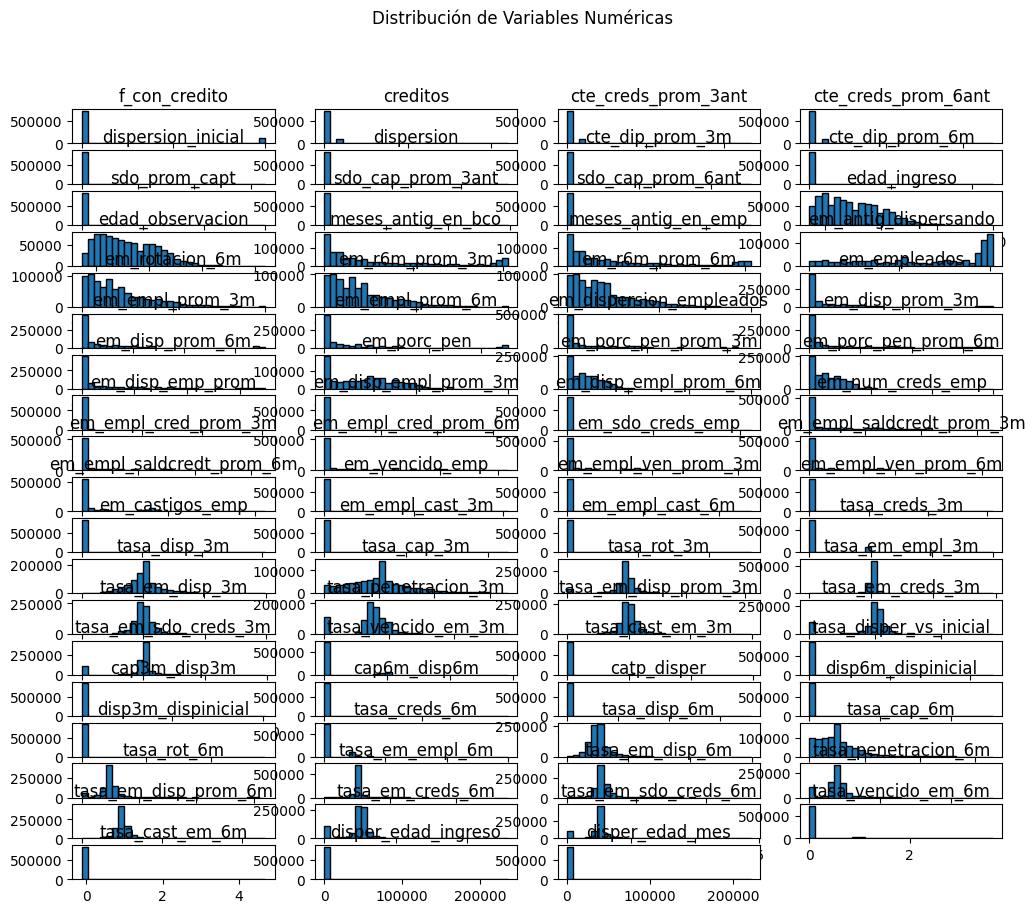

In [44]:

# Crear un número de filas y columnas dinámicas para acomodar los histogramas
n = len(numericas)
ncols = 4  # Columnas en la gráfica
nrows = (n // ncols) + (n % ncols > 0)  # Número de filas, asegurando que todos los gráficos caben

# Crear una figura con subgráficas ajustadas
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))
axes = axes.flatten()  # Aplanar para facilitar el acceso a cada subgráfico

# Crear histogramas solo para las variables numéricas
for i, var in enumerate(numericas):
    axes[i].hist(datos_df[var], bins=30, edgecolor='black')
    axes[i].set_title(var)  # Título para cada gráfico individual

# Eliminar los ejes de las subgráficas que no tengan datos
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

# Título general para el gráfico
plt.suptitle("Distribución de Variables Numéricas")

# Ajustar espacio entre las subgráficas para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta el rectángulo para dar espacio al suptítulo

# Mostrar los gráficos
plt.show()

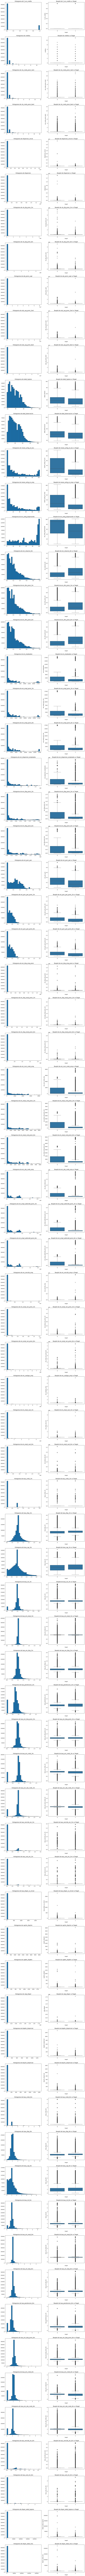

In [45]:
# Distribución de las variables numéricas y boxplot para comparar la población de acuerdo al target

# Se crea el número de filas y columnas dinámicas para acomodar las gráficas
n = len(numericas)
ncols = 2  # Una columna para el histograma y otra para el boxplot
nrows = n  # Una fila por cada variable numérica

# Crear una figura con subgráficas ajustadas
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5 * n))

# Para cada variable numérica, generar los gráficos
for i, var in enumerate(numericas):
    # Histograma en la primera columna
    axes[i, 0].hist(datos_df[var], bins=30, edgecolor='black')
    axes[i, 0].set_title(f'Histograma de {var}')

    # Boxplot en la segunda columna comparando con el 'target'
    sns.boxplot(x='target', y=var, data=datos_df, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {var} vs Target')

# Ajustar espacio entre las subgráficas para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta el rectángulo para dar espacio al suptítulo

# Mostrar los gráficos
plt.show()

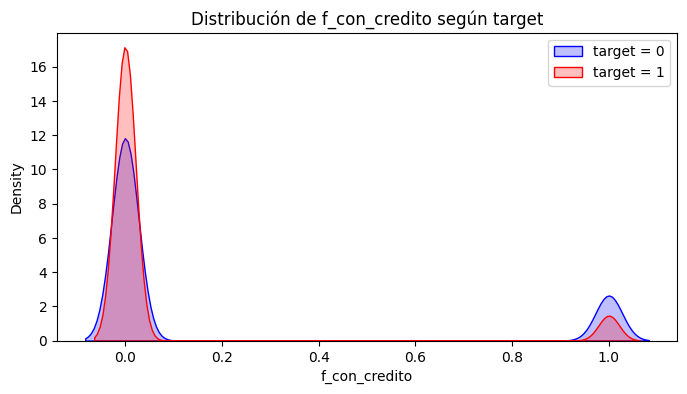

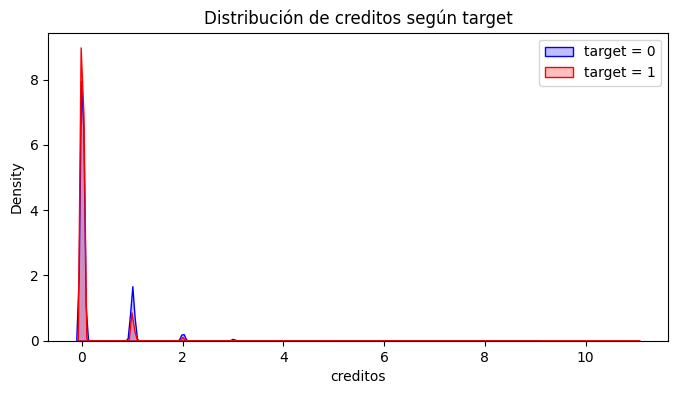

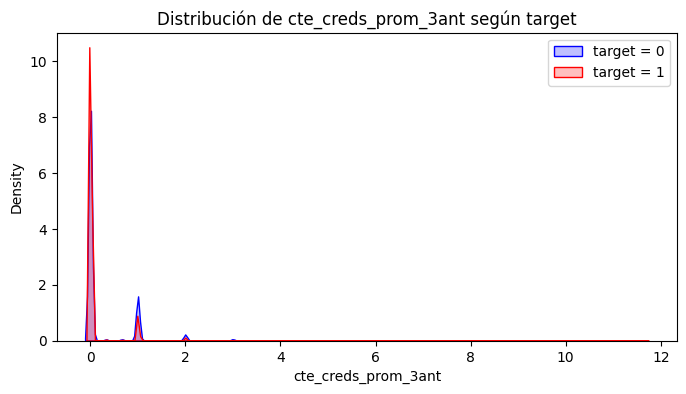

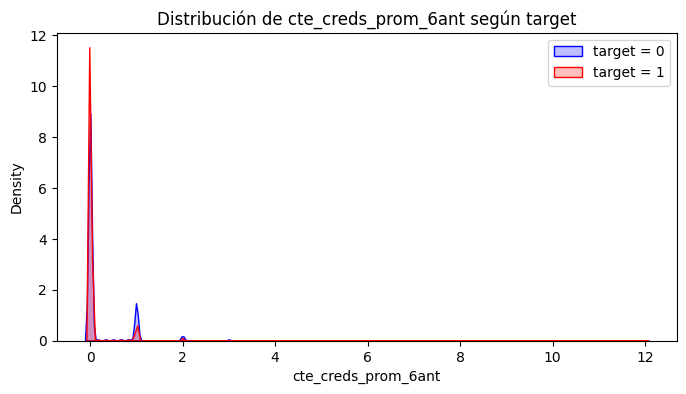

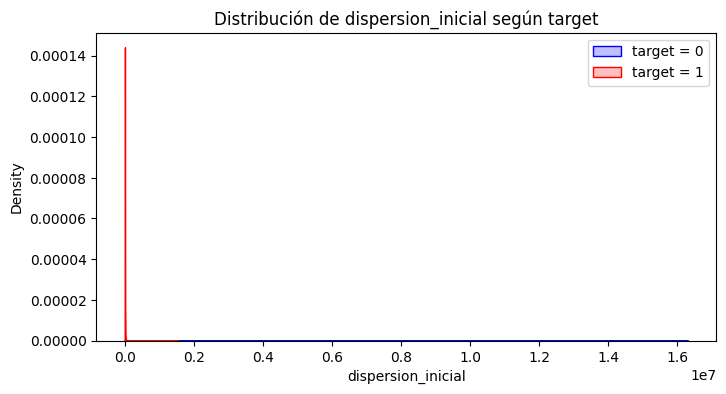

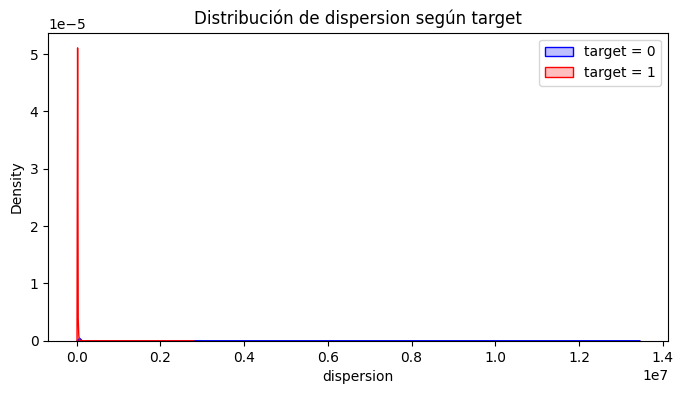

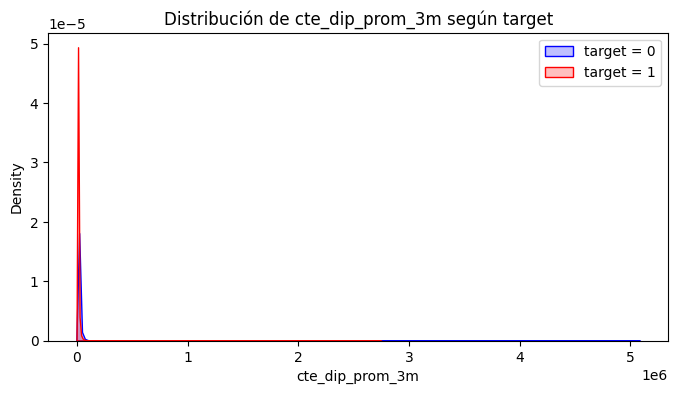

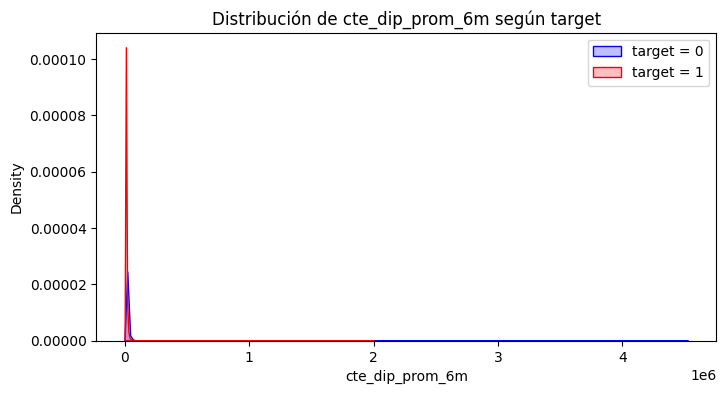

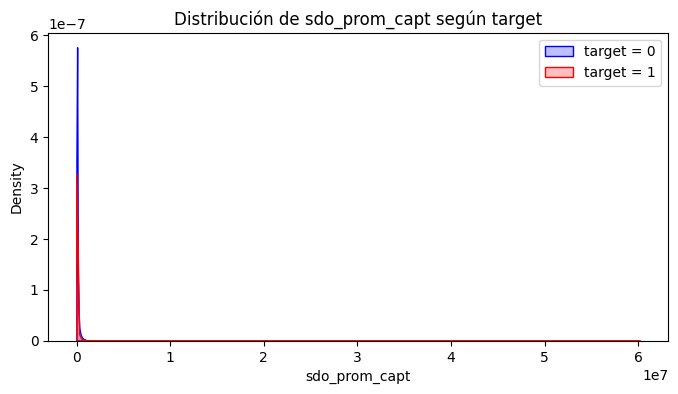

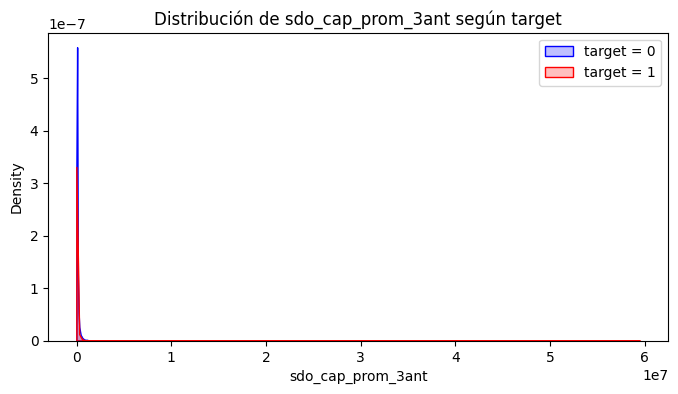

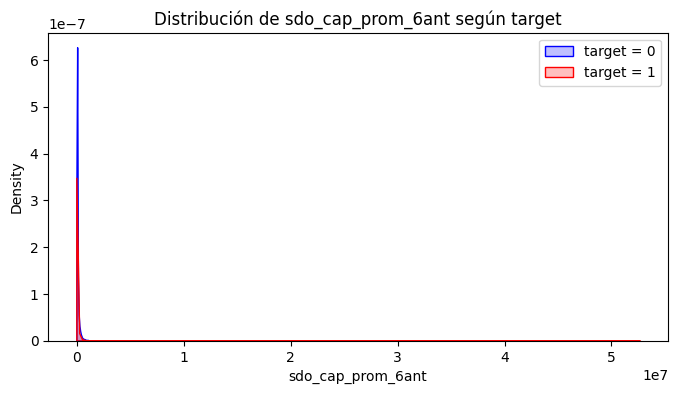

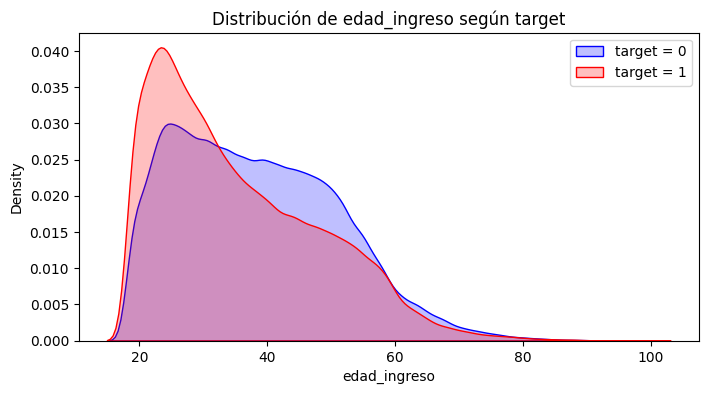

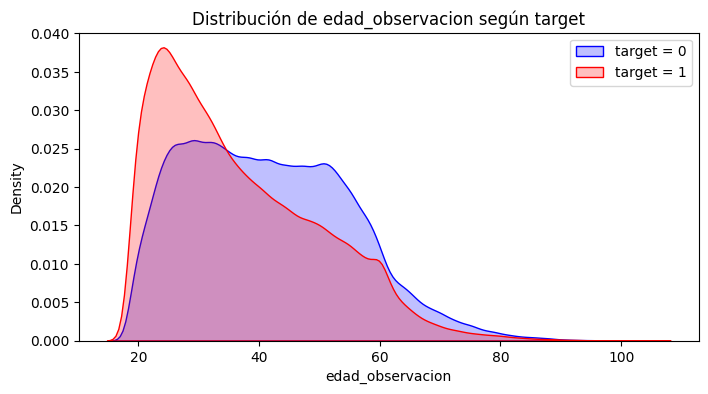

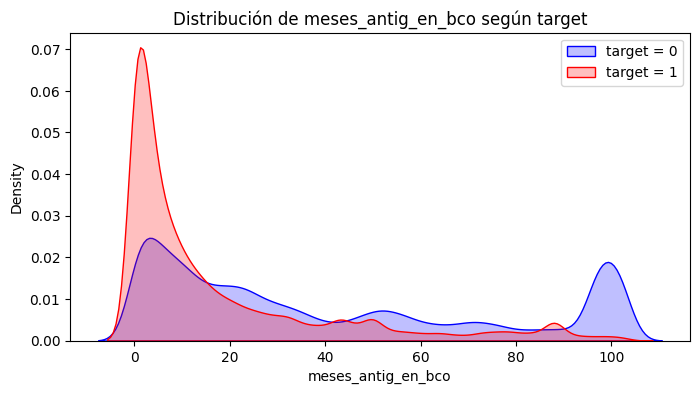

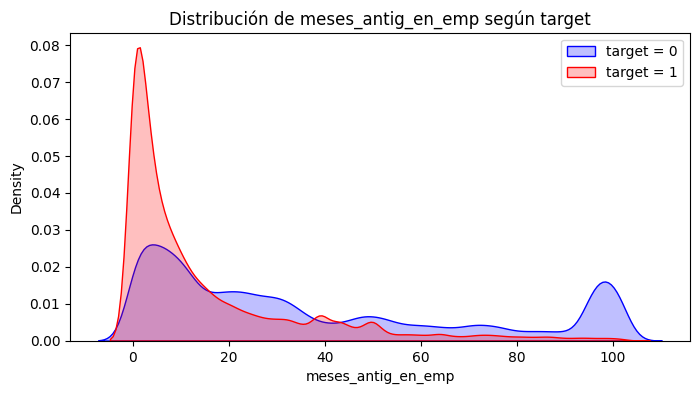

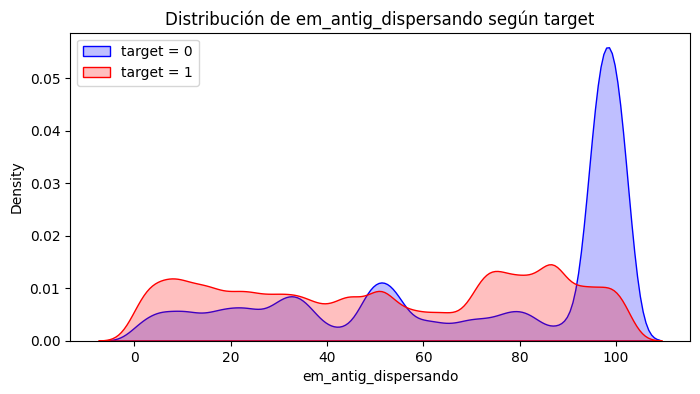

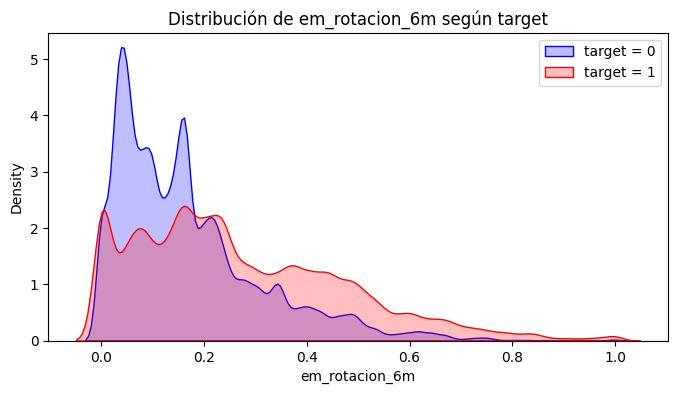

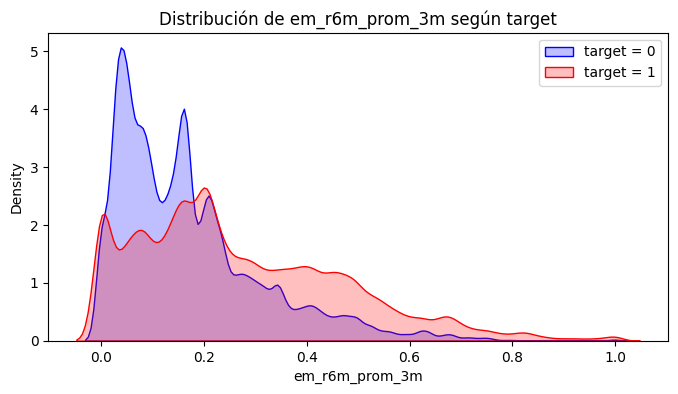

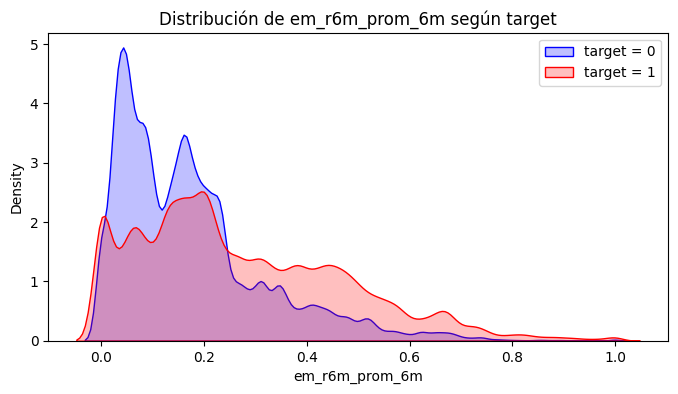

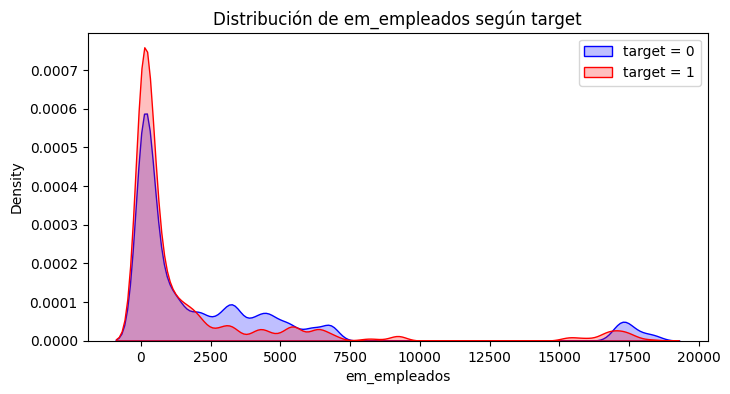

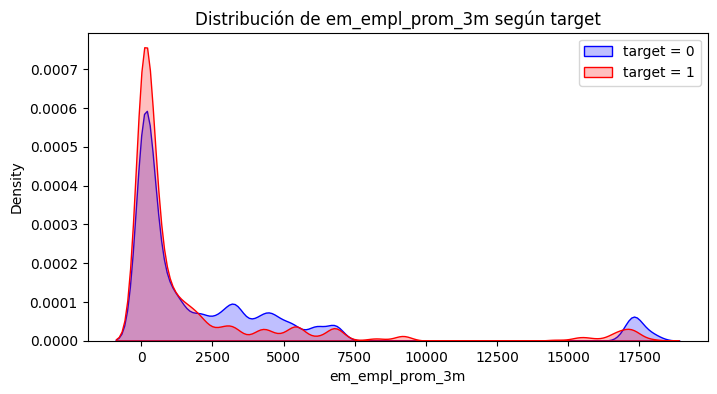

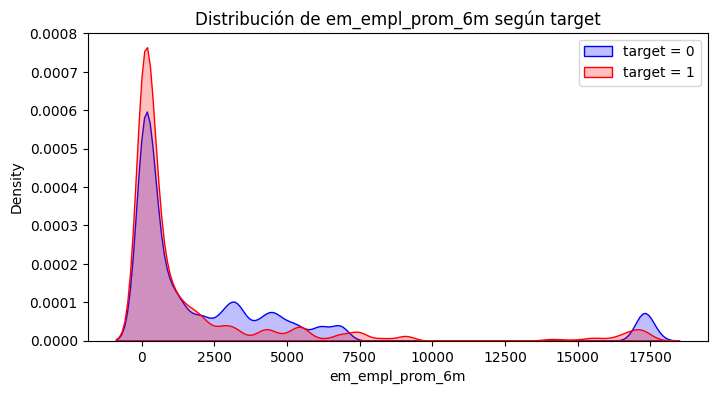

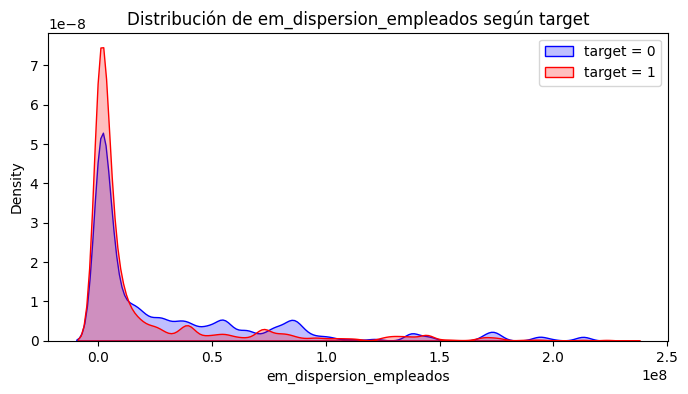

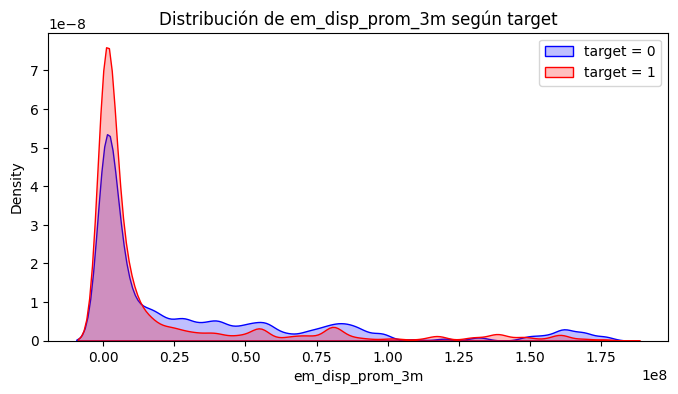

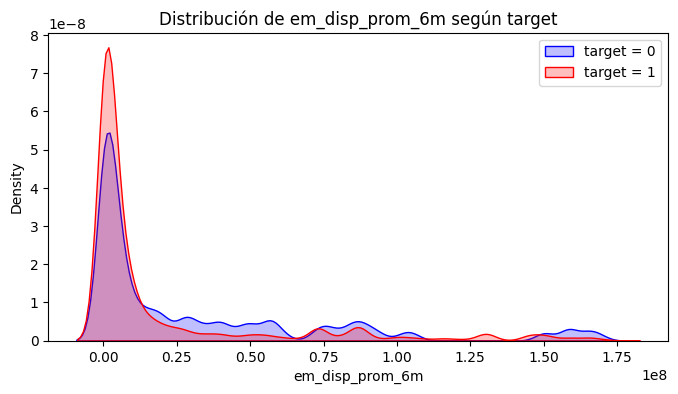

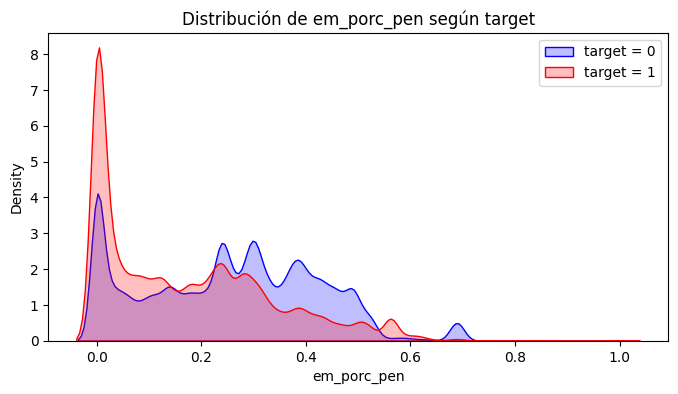

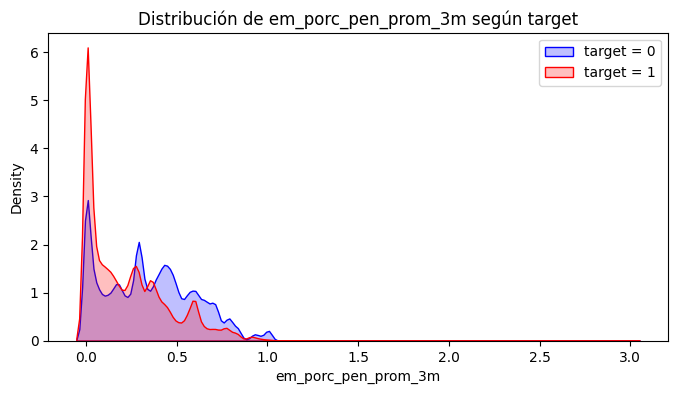

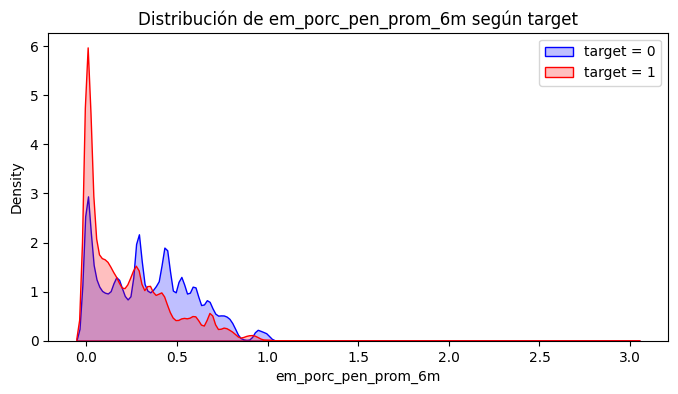

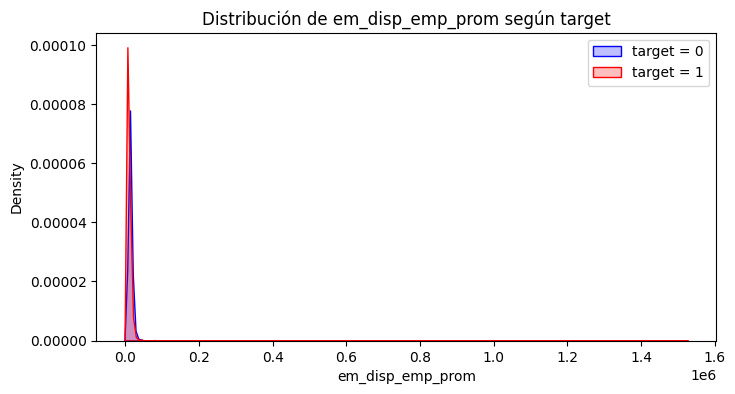

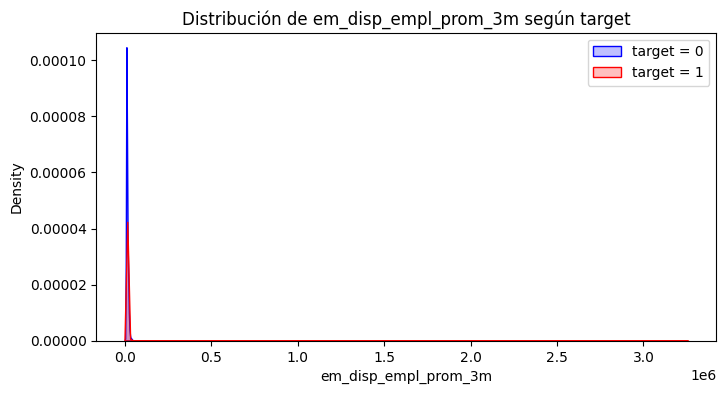

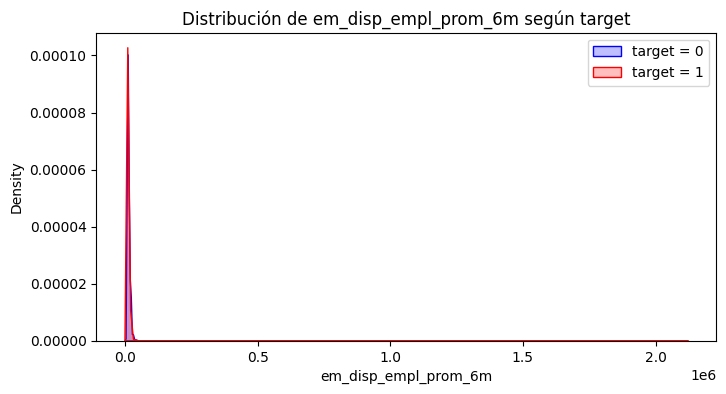

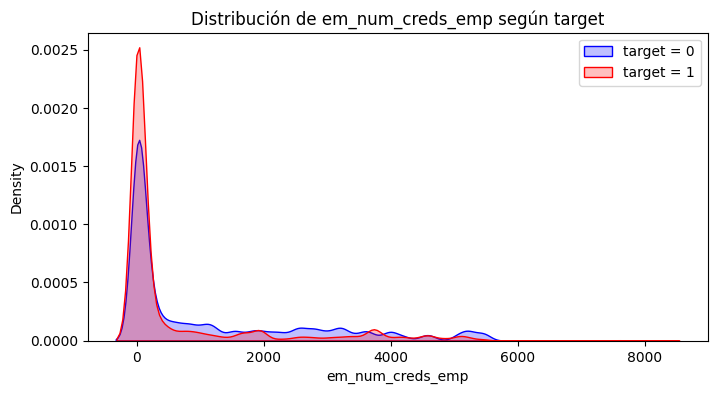

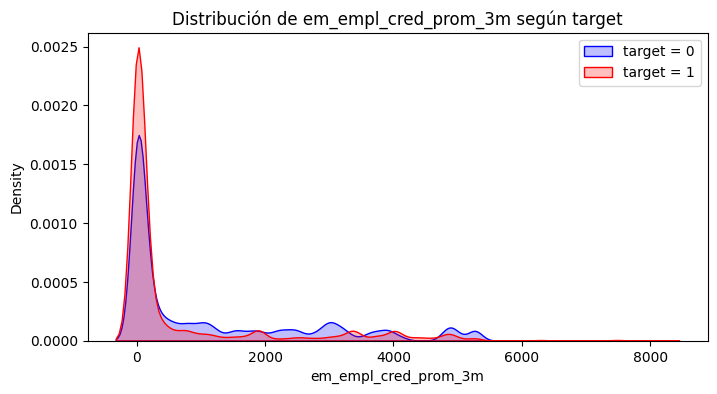

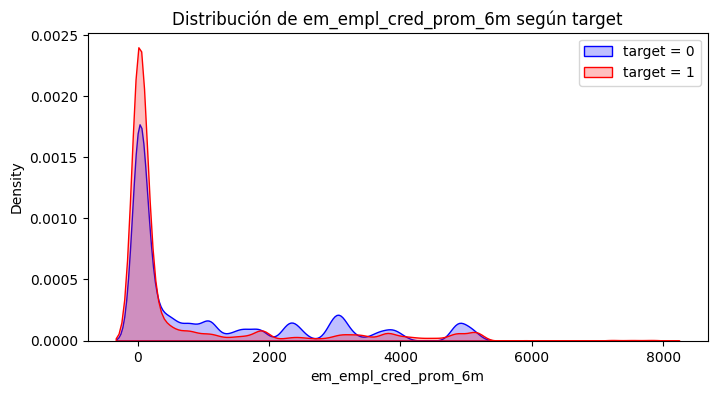

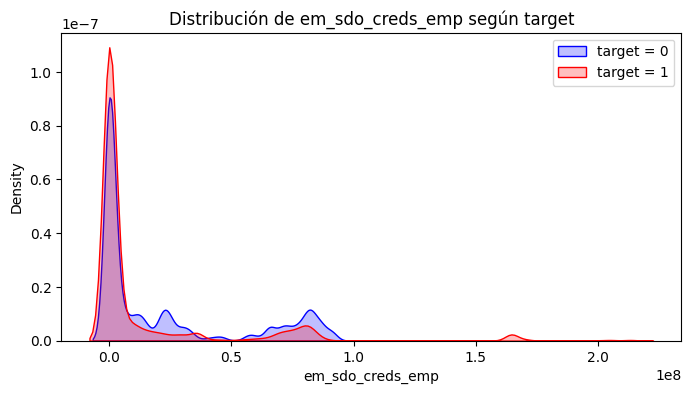

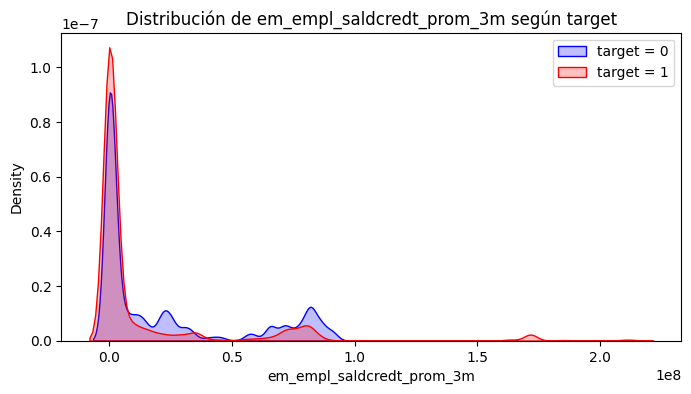

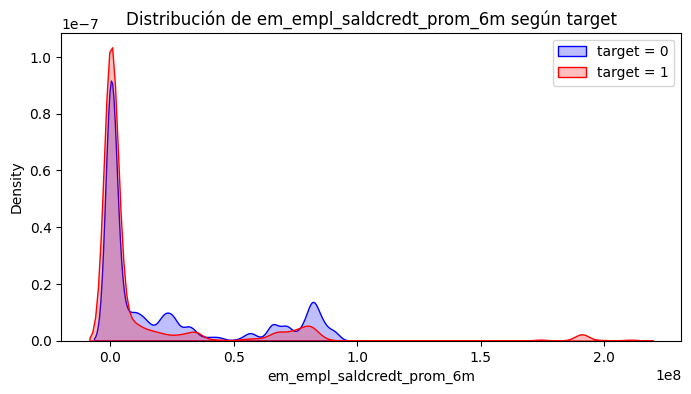

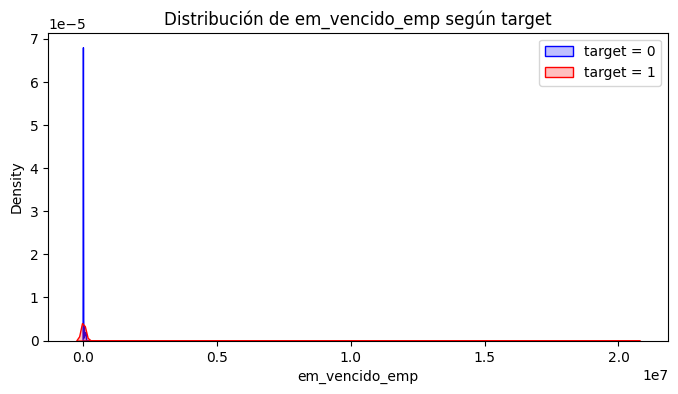

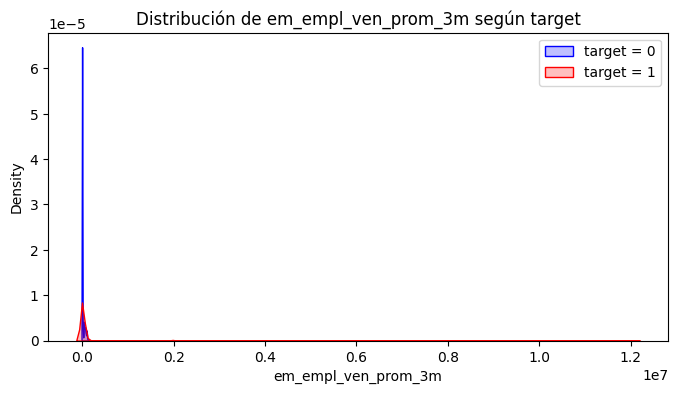

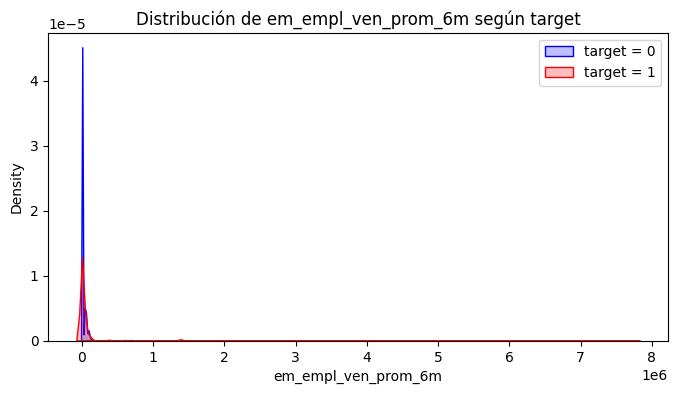

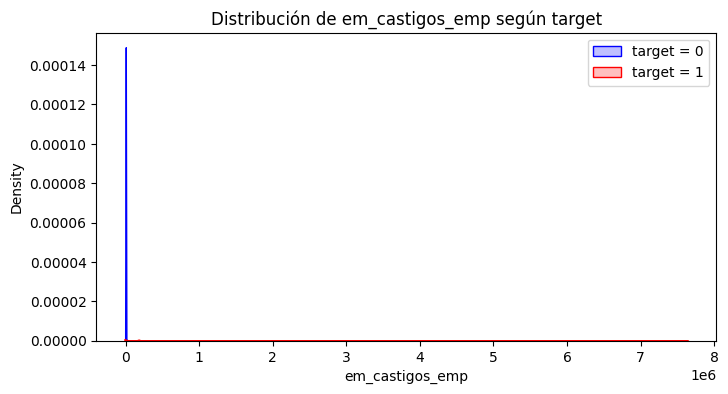

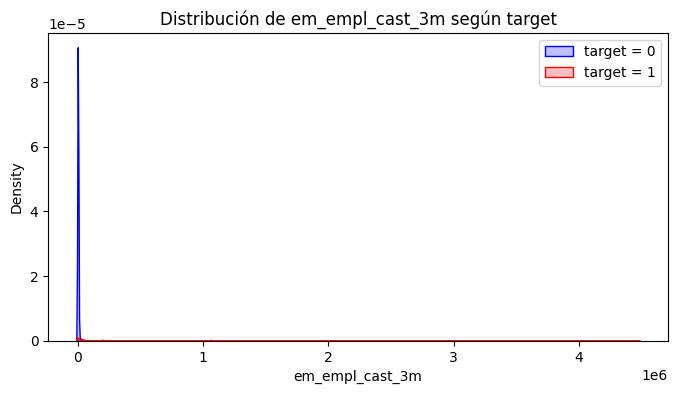

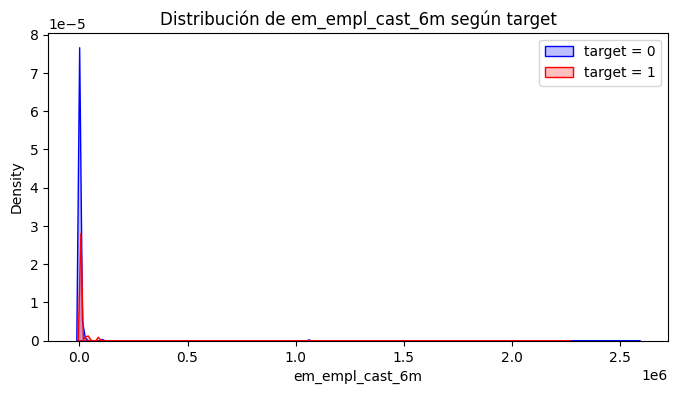

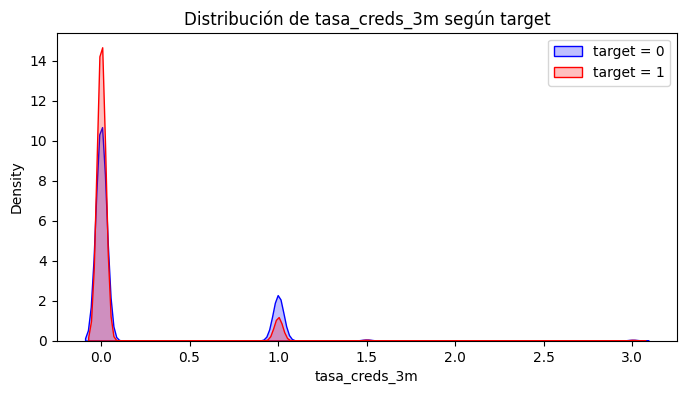

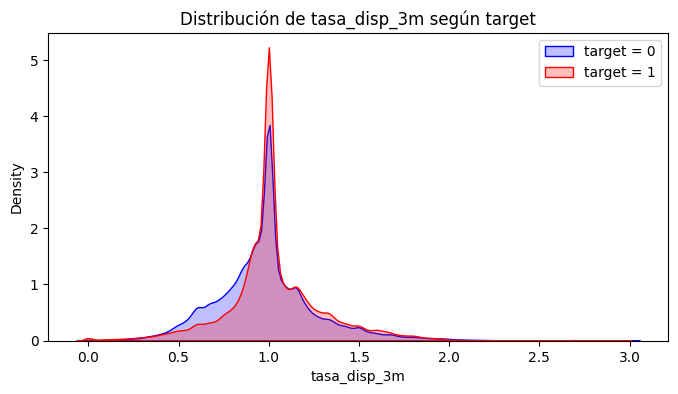

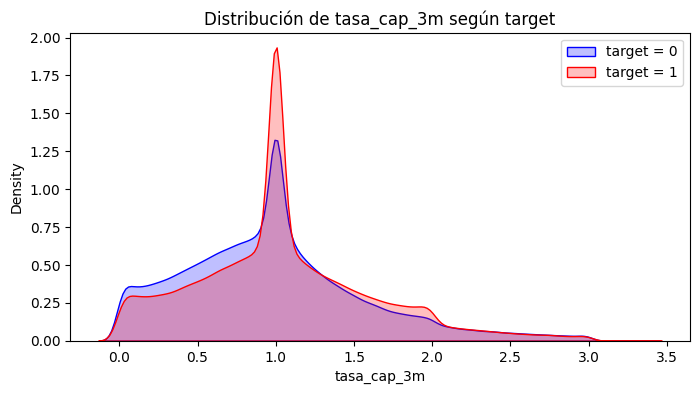

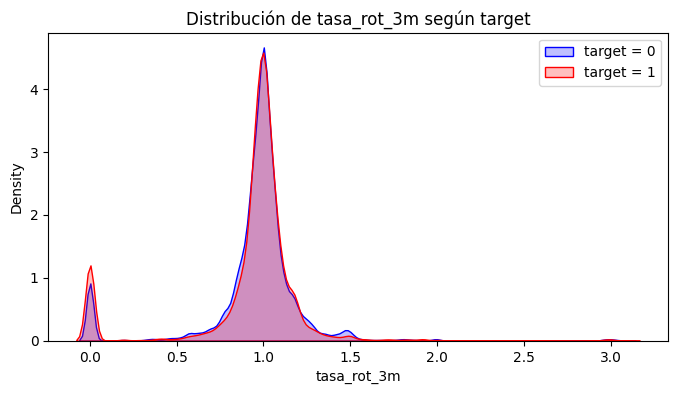

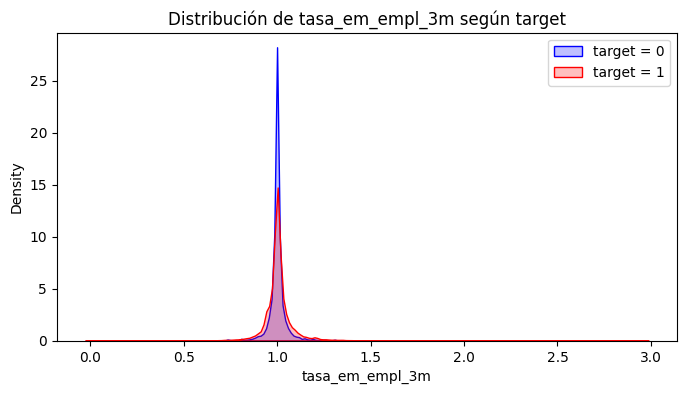

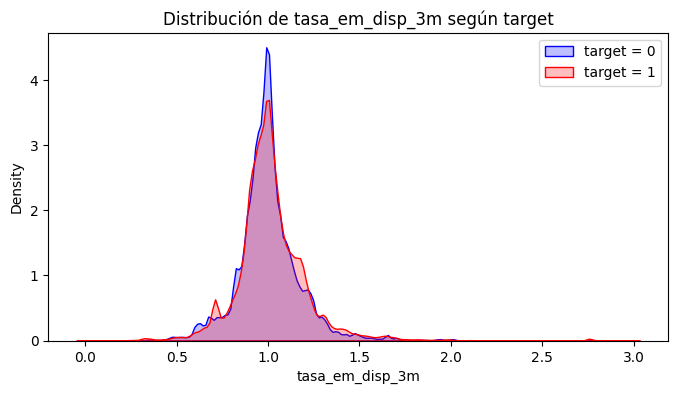

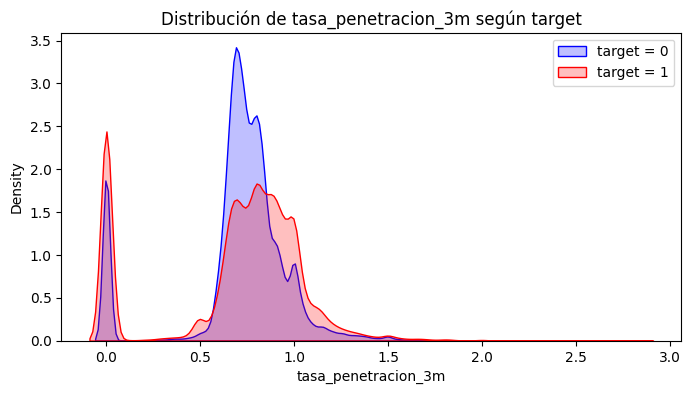

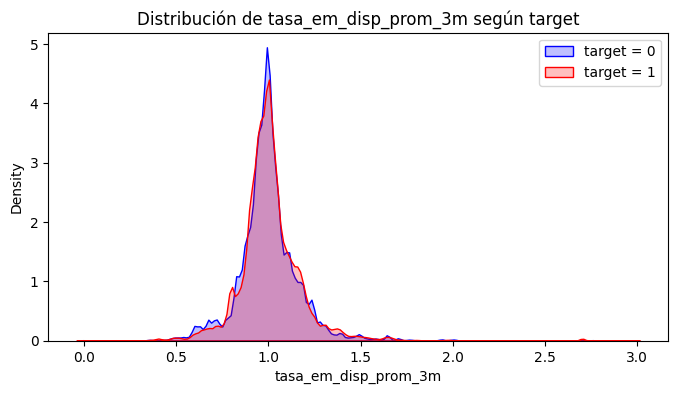

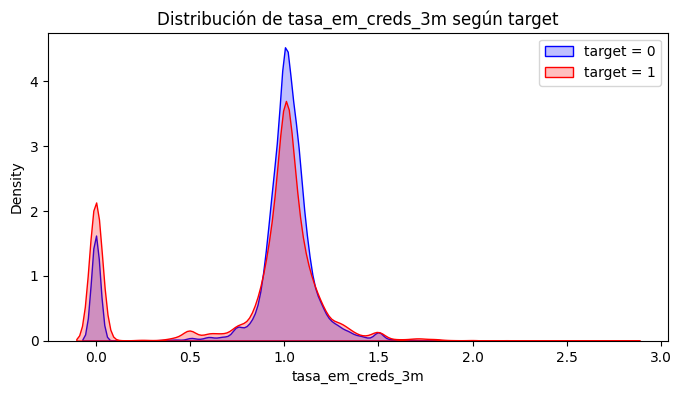

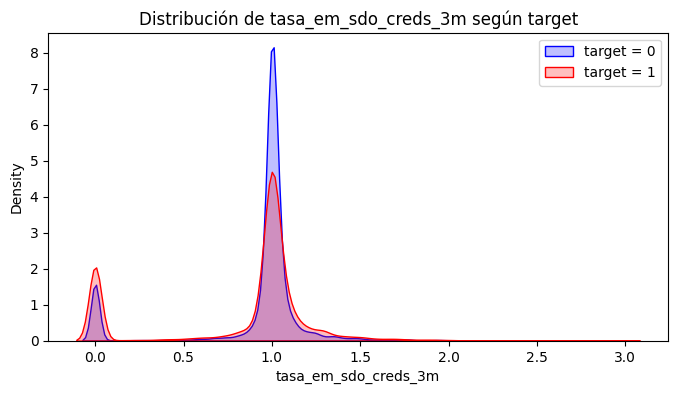

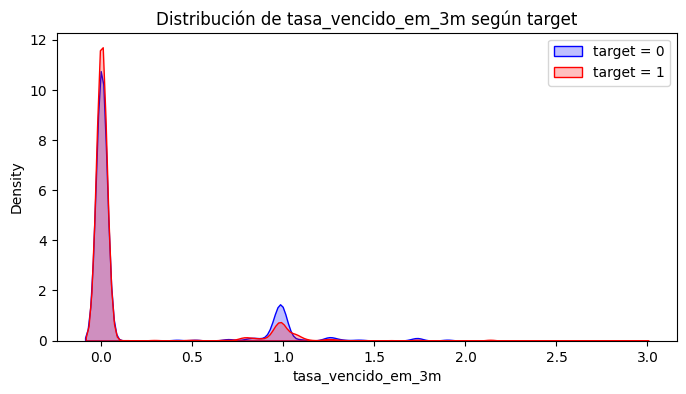

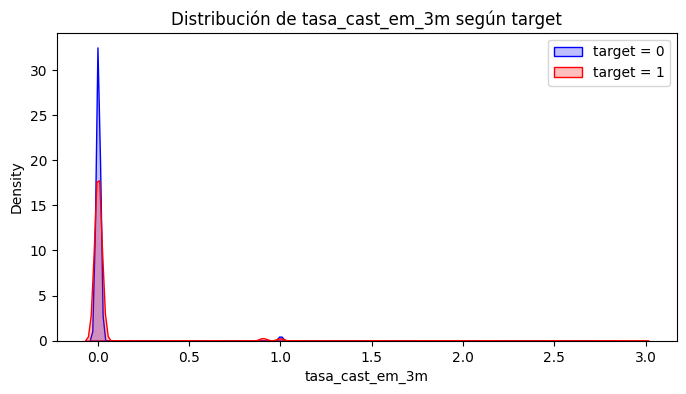

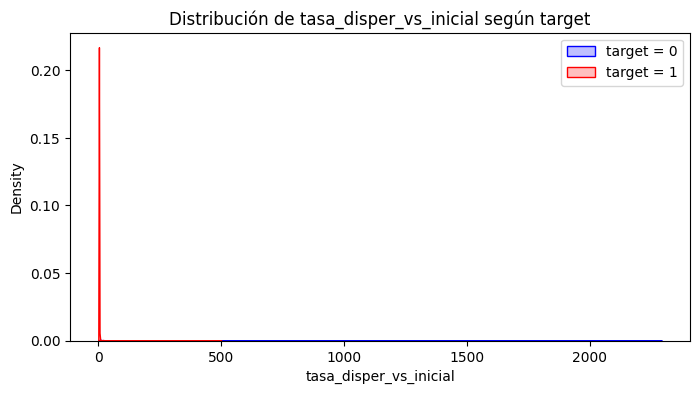

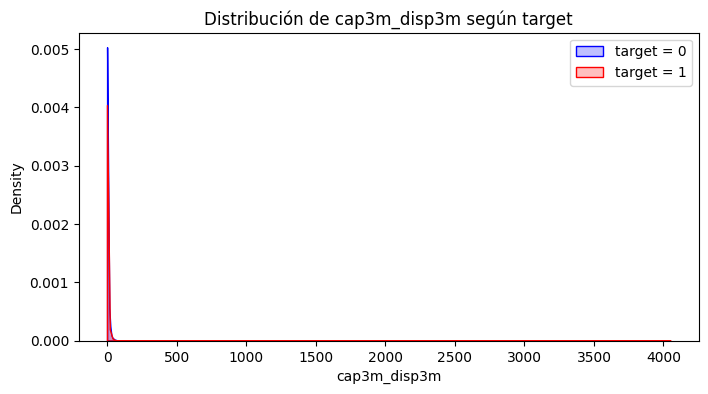

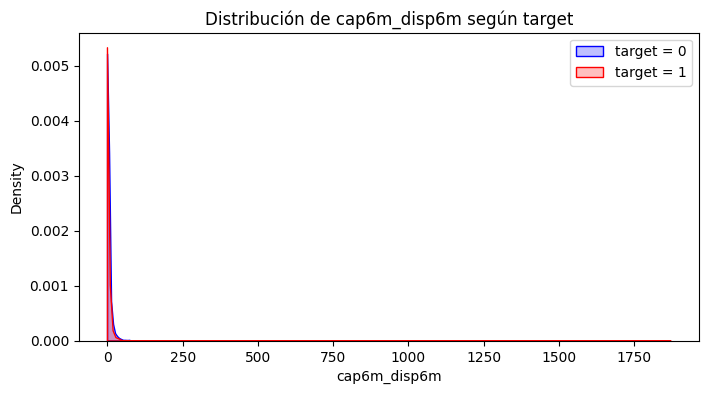

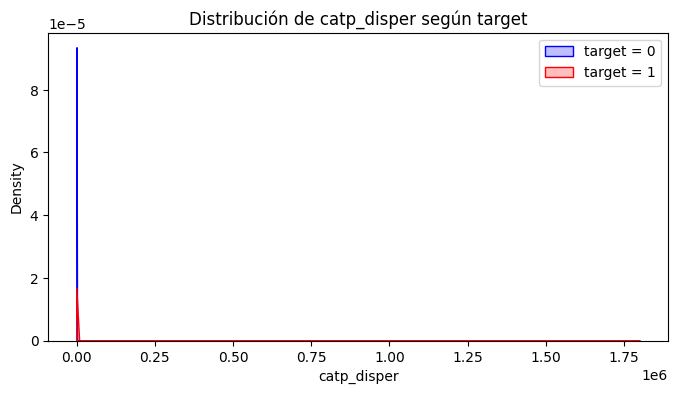

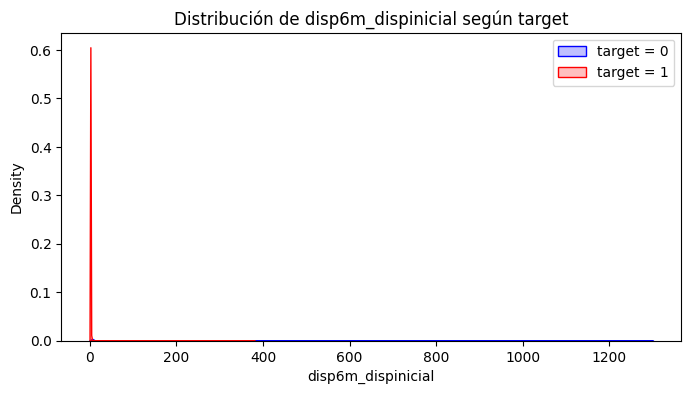

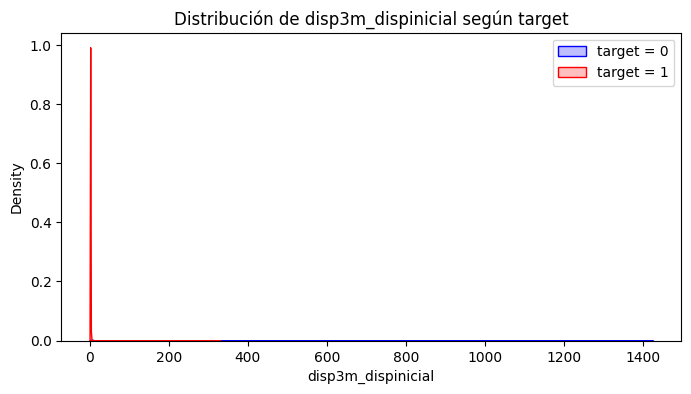

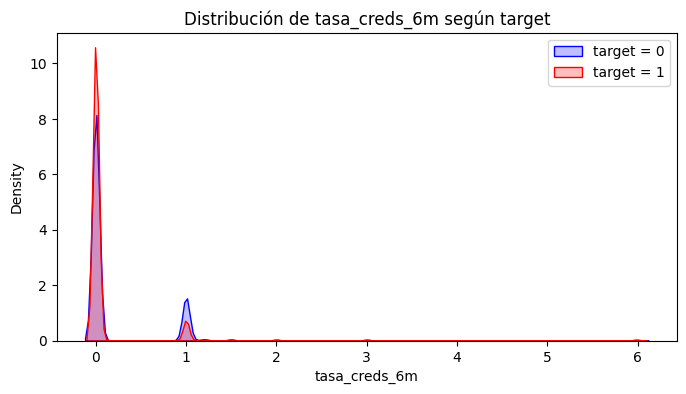

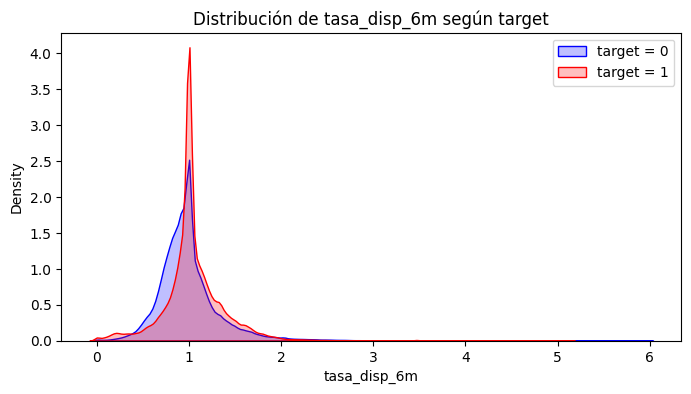

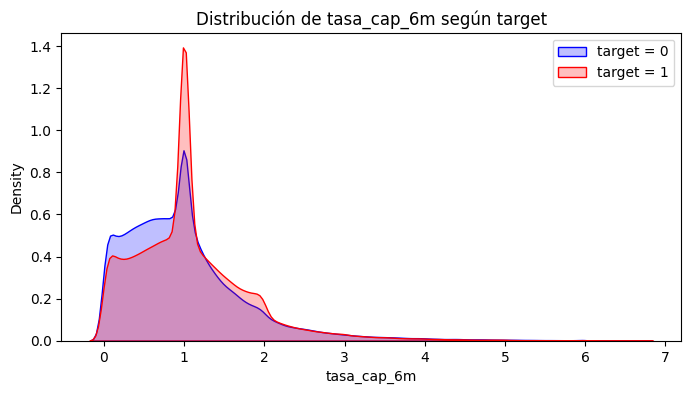

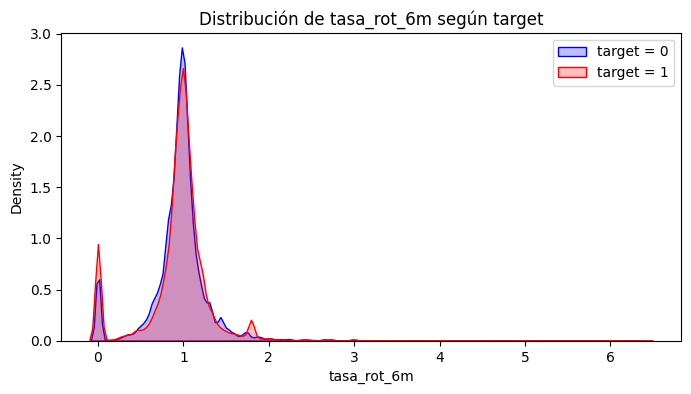

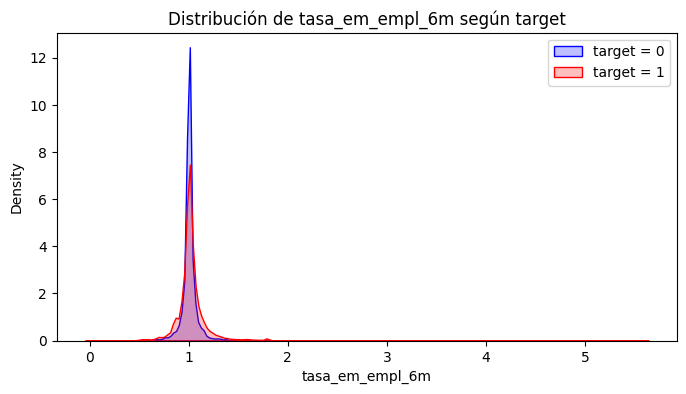

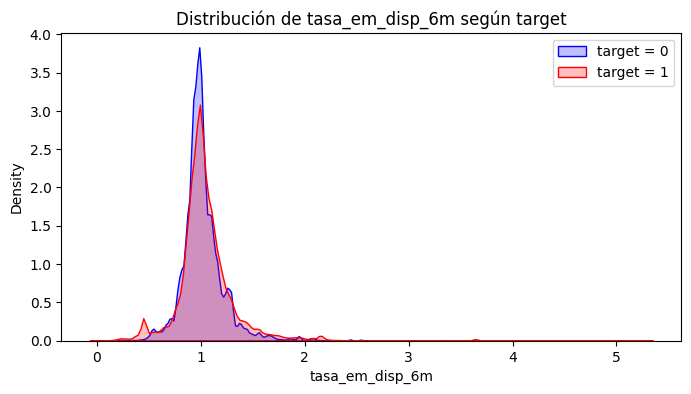

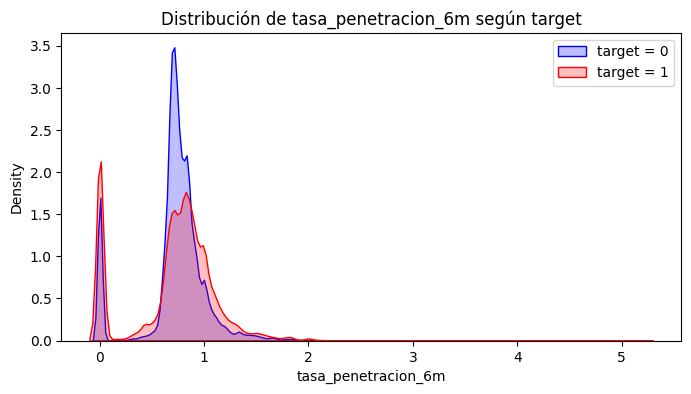

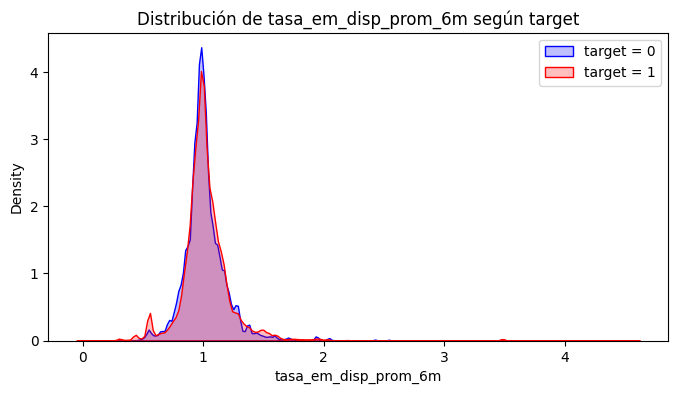

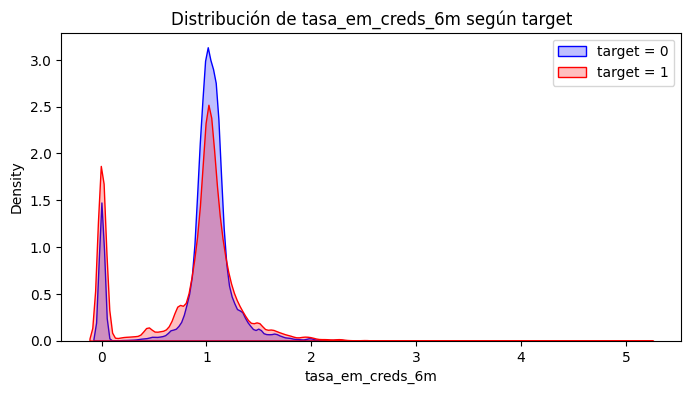

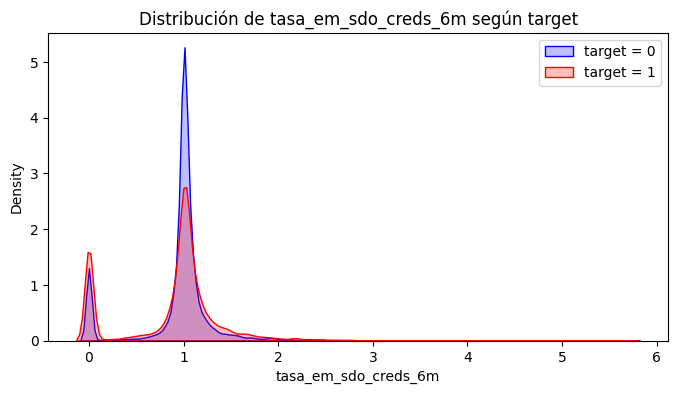

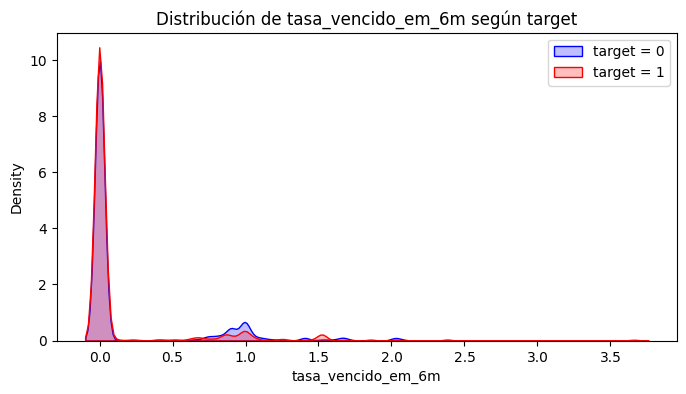

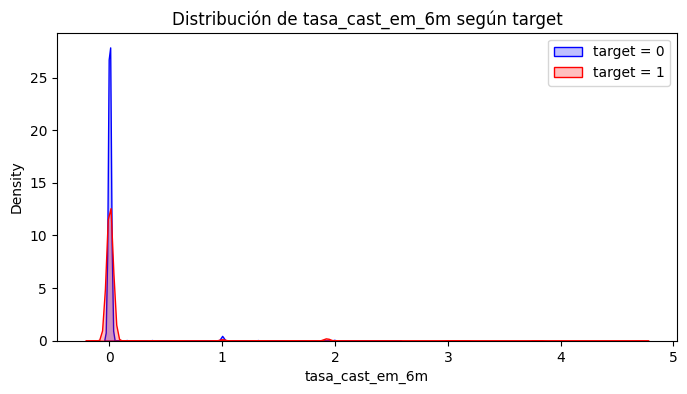

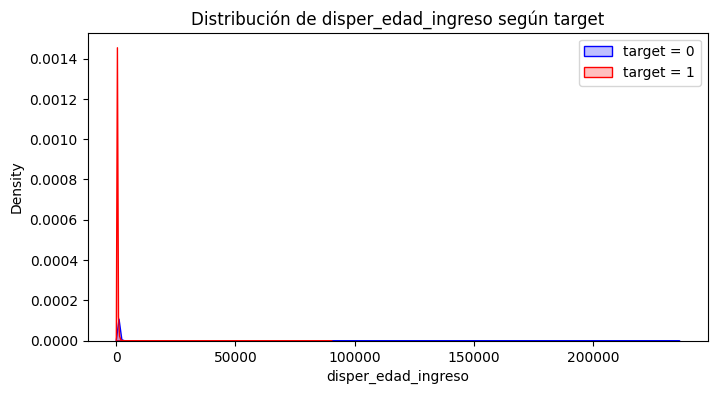

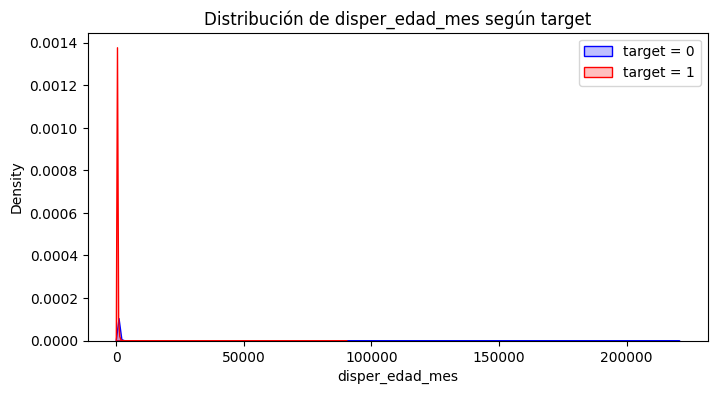

In [46]:
# Filtrar DataFrames según el valor de 'target'
df_target_0 = datos_df[datos_df['target'] == 0]
df_target_1 = datos_df[datos_df['target'] == 1]

# Crear un gráfico KDE para cada variable en 'numericas', separando por 'target'
for col in numericas:
    plt.figure(figsize=(8, 4))

    # KDE para target == 0
    sns.kdeplot(df_target_0[col], fill=True, label="target = 0", color='blue')

    # KDE para target == 1
    sns.kdeplot(df_target_1[col], fill=True, label="target = 1", color='red')

    # Título y leyenda
    plt.title(f"Distribución de {col} según target")
    plt.legend()
    plt.show()


Primero entrenaremos el modelo considerando los outliers, si no se obtiene buen rendimiento, se entrenará haciendo transformación  logarítmica, por ejemplo, o bien eliminarlos.

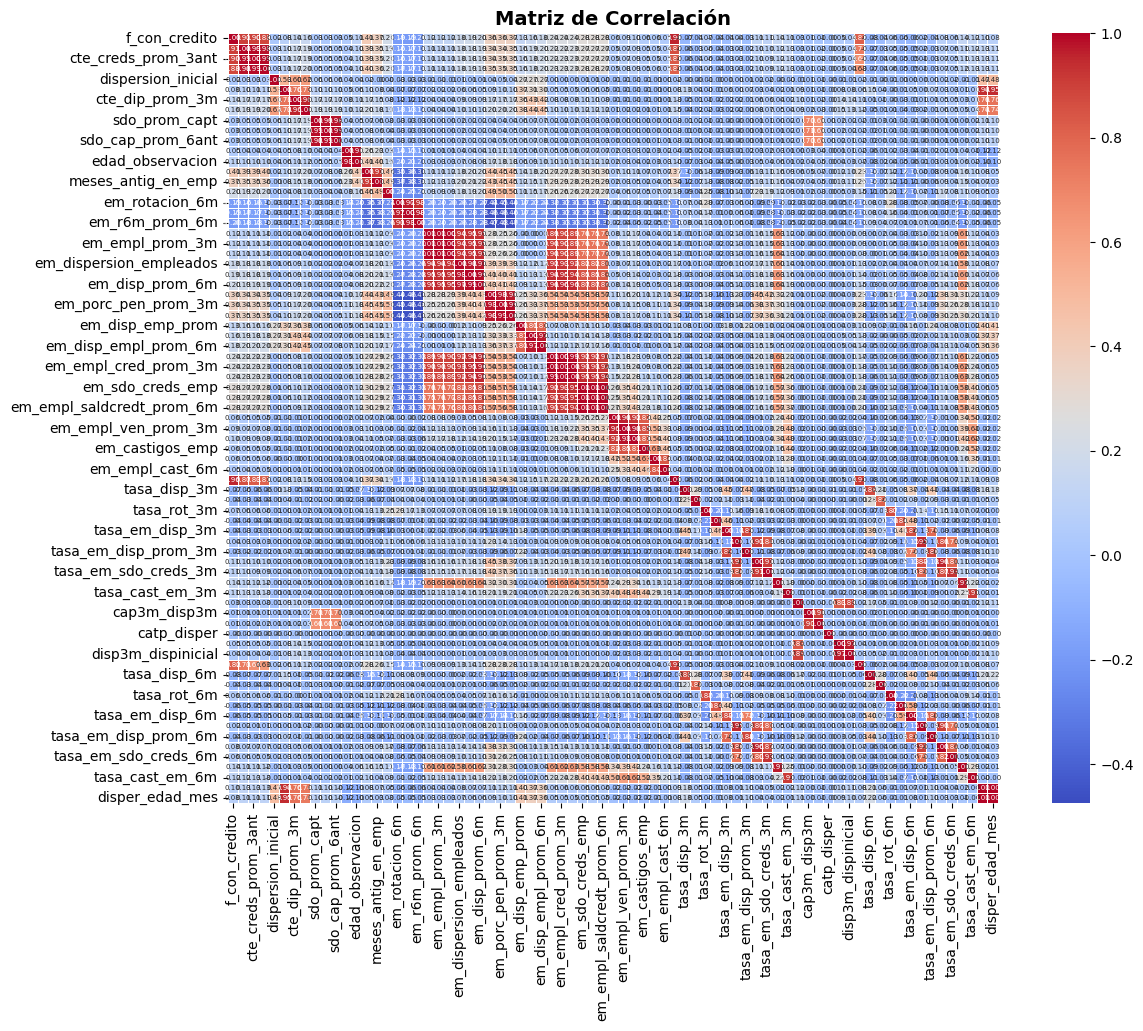

In [47]:
#Correlación de variables numéricas
corr = datos_df[numericas].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, cbar=True, annot_kws={"size": 5})

#sns.heatmap(round(datos_df.corr(),2),annot=True)

plt.title("Matriz de Correlación", fontsize=14, fontweight='bold')
plt.show()

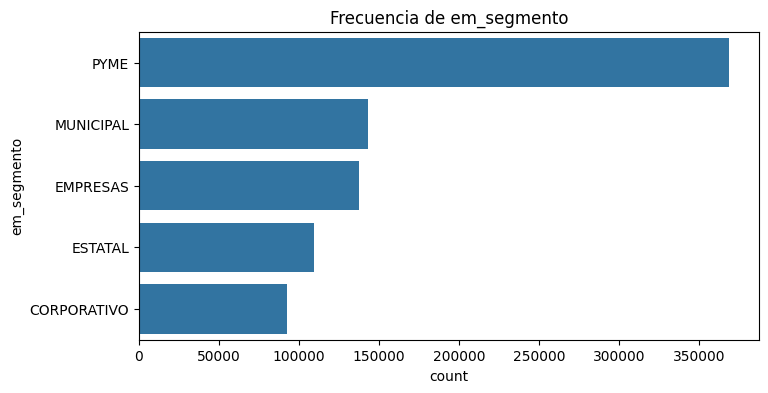

La columna em_tipo_gob no está en el DataFrame


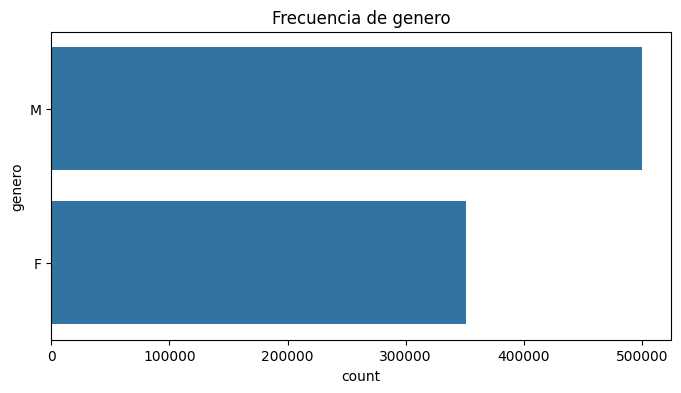

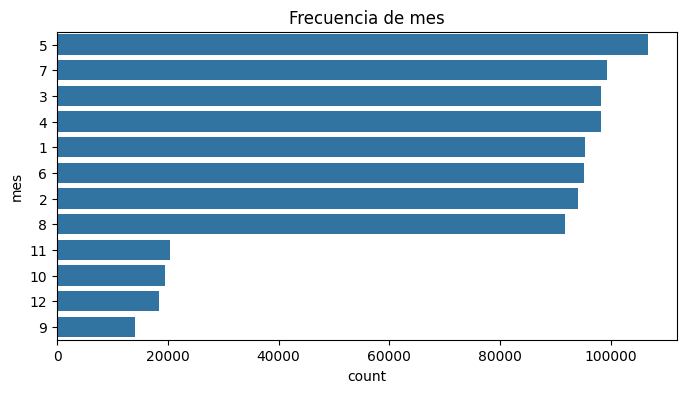

In [48]:
# Gráficos de barras para variables categóricas

for col in categoricas:
    if col in datos_df.columns:  # Verifica que la columna existe antes de graficar
        plt.figure(figsize=(8, 4))
        sns.countplot(y=datos_df[col], order=datos_df[col].value_counts().index)
        plt.title(f"Frecuencia de {col}")
        plt.show()
    else:
        print(f"La columna {col} no está en el DataFrame")

In [49]:
categoricas = ['em_segmento', 'genero', 'mes']

In [50]:
datos_df[categoricas].describe(include="object").T

count unique   top    freq
em_segmento  850907      5  PYME  368704
genero       850907      2     M  499890
mes          850907     12     5  106604


Análisis de la columna: em_segmento
Frecuencia:
 em_segmento
PYME           368704
MUNICIPAL      142906
EMPRESAS       137164
ESTATAL        109415
CORPORATIVO     92718
Name: count, dtype: int64
Porcentaje:
 em_segmento
PYME          43.33
MUNICIPAL     16.79
EMPRESAS      16.12
ESTATAL       12.86
CORPORATIVO   10.90
Name: proportion, dtype: float64


<ipython-input-51-296df5b64158>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col_cat, data=datos_df, palette="pastel")


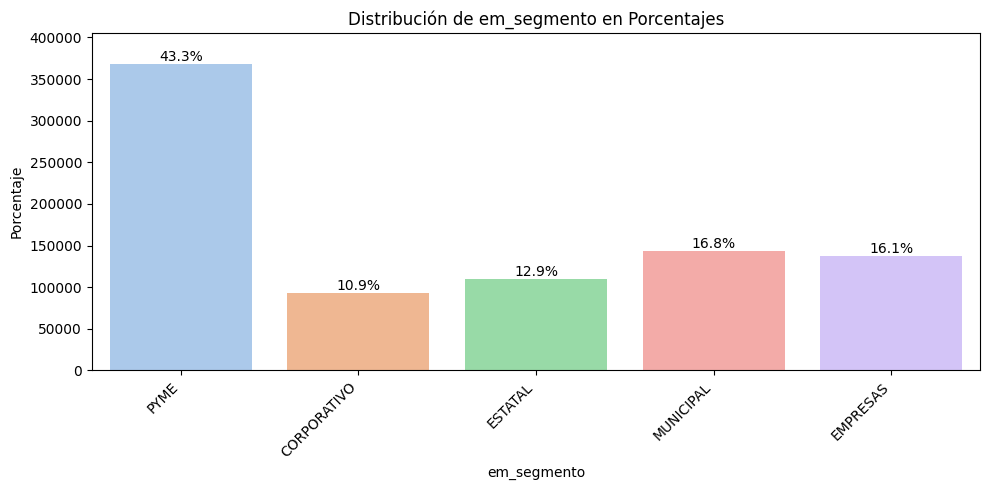


Análisis de la columna: genero
Frecuencia:
 genero
M    499890
F    351017
Name: count, dtype: int64
Porcentaje:
 genero
M   58.75
F   41.25
Name: proportion, dtype: float64


<ipython-input-51-296df5b64158>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col_cat, data=datos_df, palette="pastel")


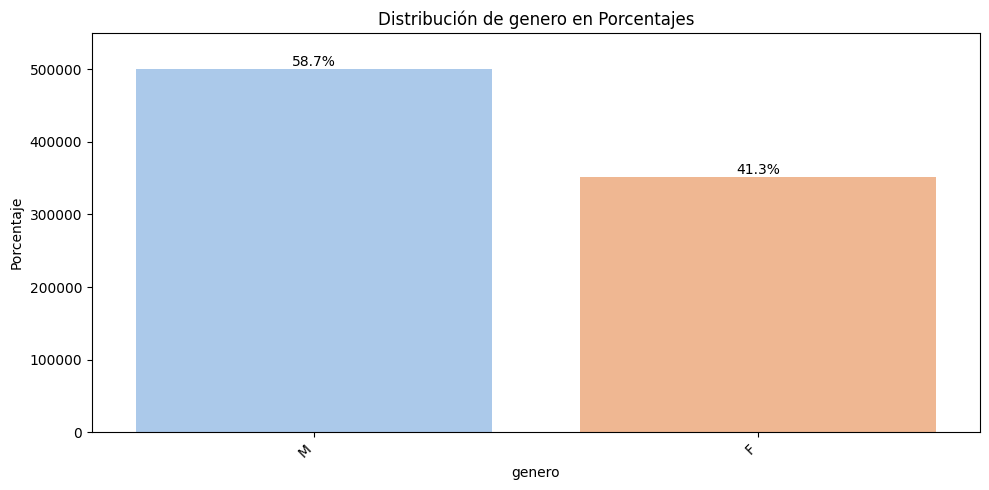


Análisis de la columna: mes
Frecuencia:
 mes
5     106604
7      99276
3      98272
4      98133
1      95286
6      95079
2      93977
8      91776
11     20463
10     19571
12     18362
9      14108
Name: count, dtype: int64
Porcentaje:
 mes
5    12.53
7    11.67
3    11.55
4    11.53
1    11.20
6    11.17
2    11.04
8    10.79
11    2.40
10    2.30
12    2.16
9     1.66
Name: proportion, dtype: float64


<ipython-input-51-296df5b64158>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col_cat, data=datos_df, palette="pastel")


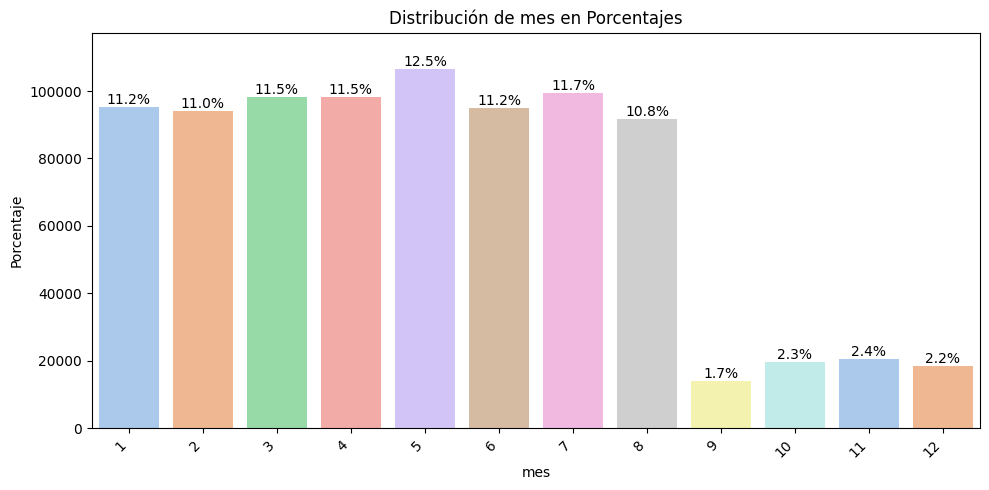

In [51]:
for col_cat in categoricas:
    plt.figure(figsize=(10, 5))  # Ajustar tamaño de la figura

    # Calcular frecuencia y porcentaje
    frecuencia = datos_df[col_cat].value_counts()
    porcentaje = datos_df[col_cat].value_counts(normalize=True) * 100  # Convertir a porcentaje

    print(f"\nAnálisis de la columna: {col_cat}")
    print("Frecuencia:\n", frecuencia)
    print("Porcentaje:\n", porcentaje)

    # Gráfico de barras con proporciones
    ax = sns.countplot(x=col_cat, data=datos_df, palette="pastel")

    # Agregar etiquetas de porcentaje sobre las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height()/len(datos_df)*100:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f"Distribución de {col_cat} en Porcentajes")
    plt.ylabel("Porcentaje")
    plt.xlabel(col_cat)

    # Ajuste para evitar que los nombres de las categorías se encimen
    plt.xticks(rotation=45, ha="right")  # Rota etiquetas y las alinea a la derecha si es necesario

    plt.ylim(0, max(frecuencia) * 1.1)  # Ajuste de escala para etiquetas
    plt.tight_layout()  # Optimiza el espacio de la gráfica
    plt.show()

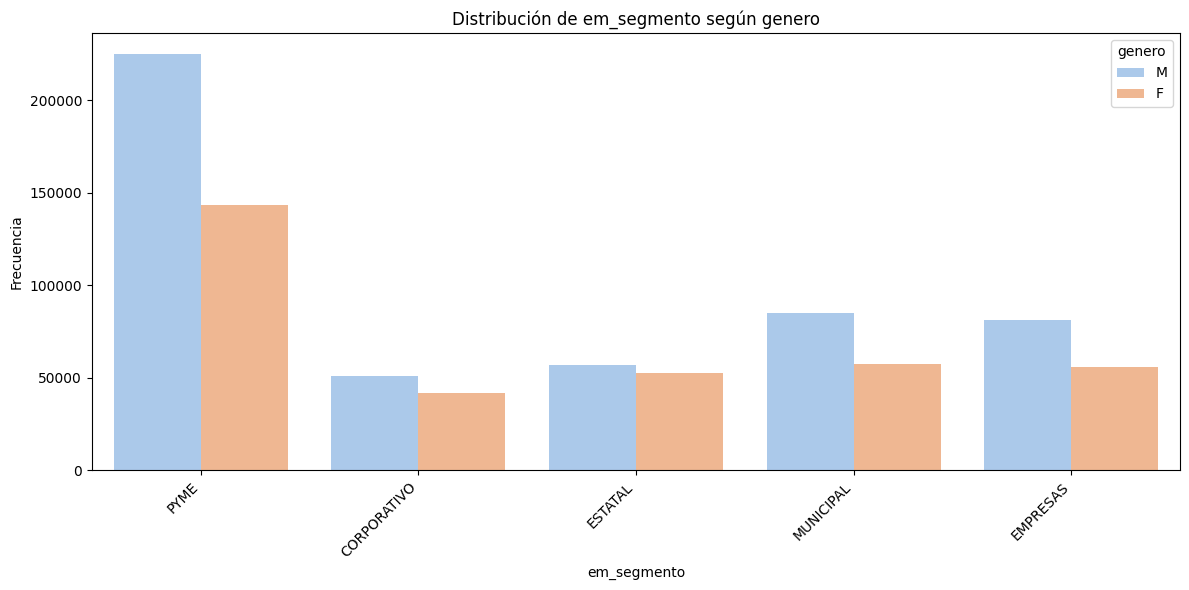

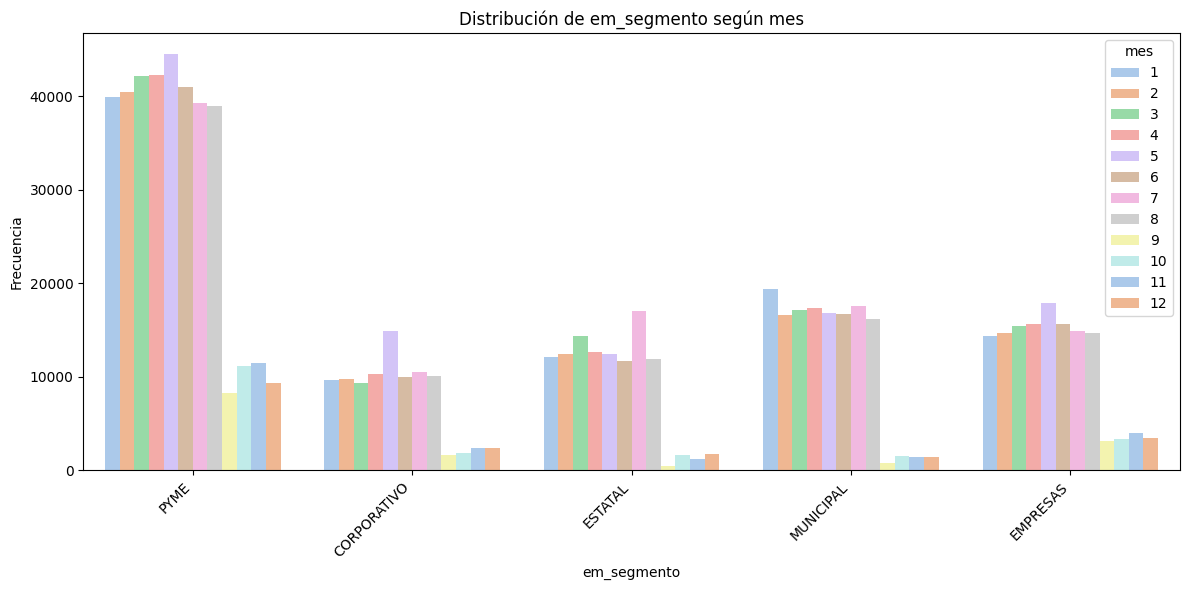

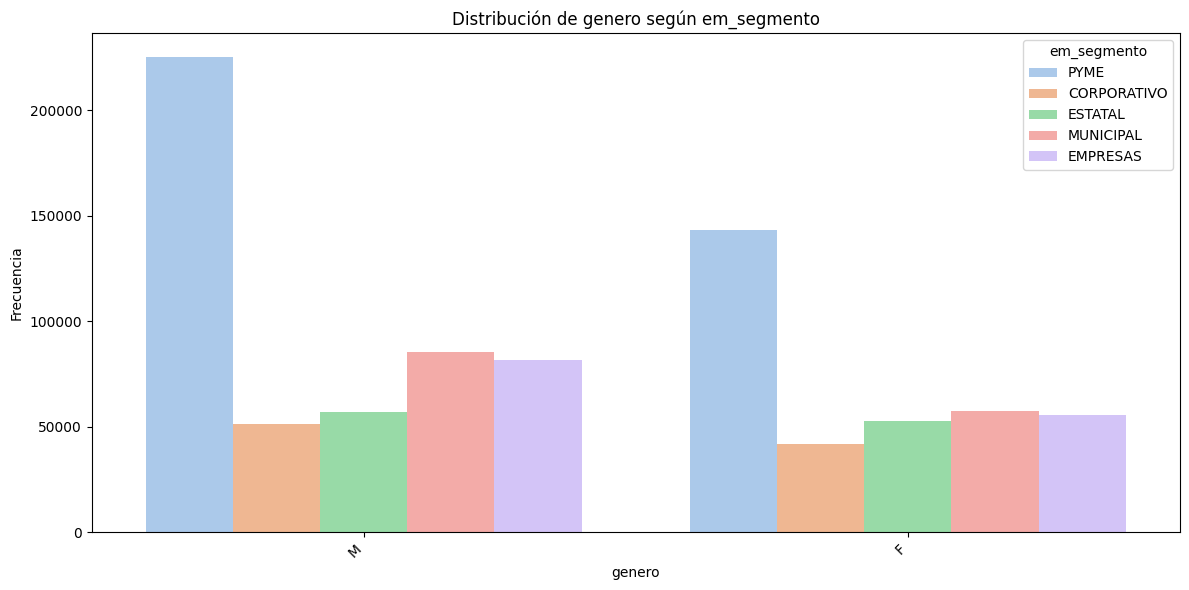

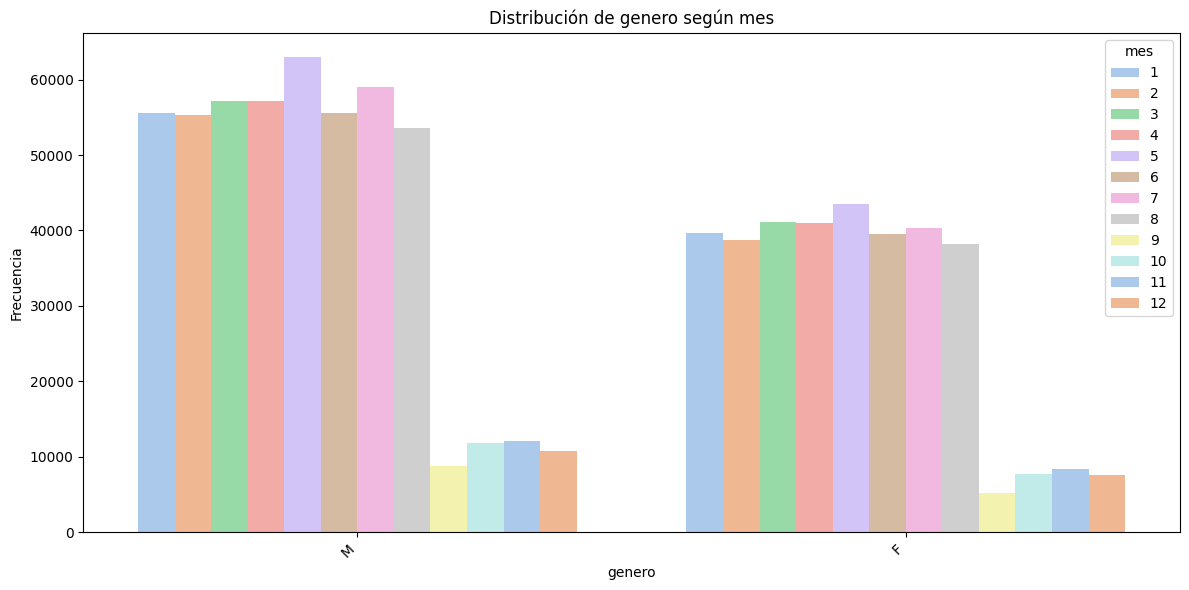

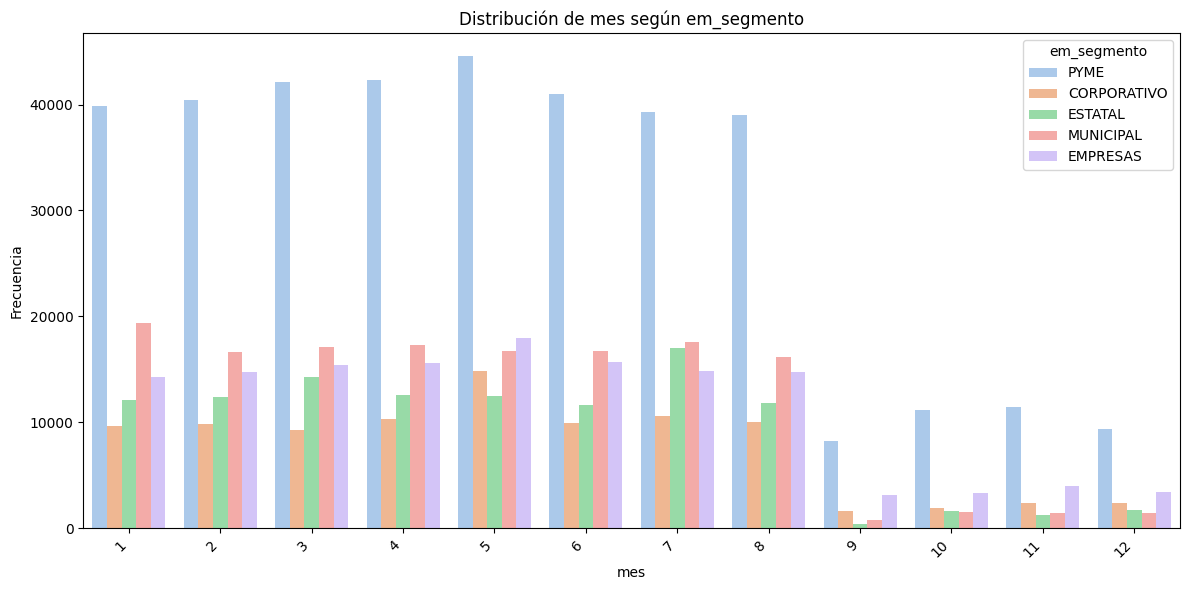

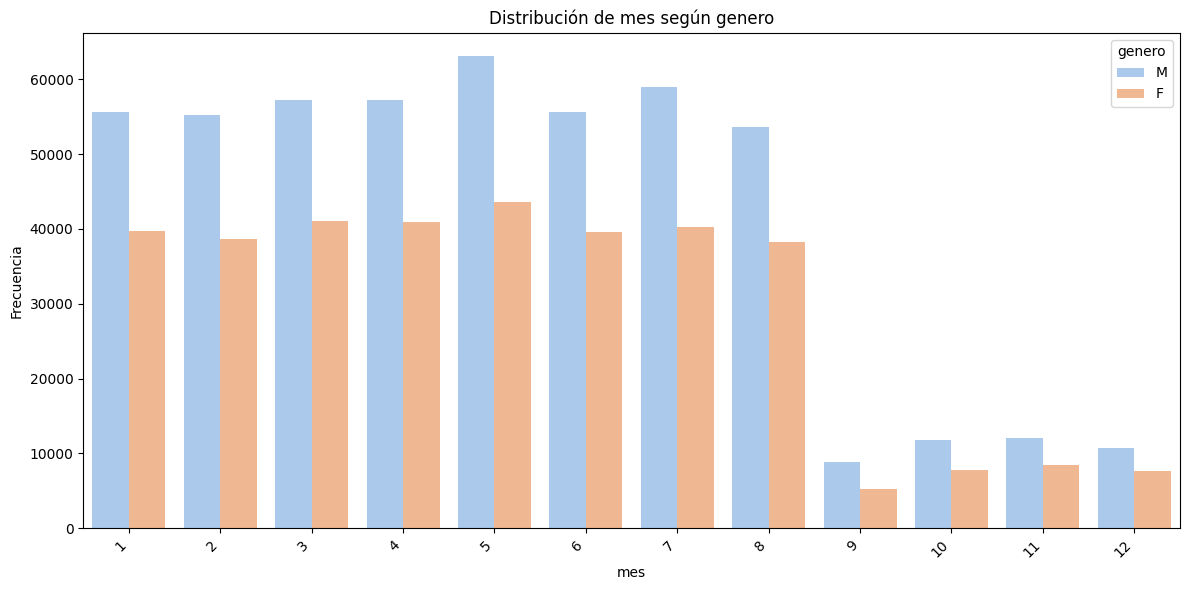

In [52]:
# Análisis bivariado con gráfico de barras


for columna_1 in categoricas:
    for columna_2 in categoricas:
        if columna_1 != columna_2:
            plt.figure(figsize=(12, 6))  # Ajuste del tamaño de la figura

            ax = sns.countplot(x=columna_1, hue=columna_2, data=datos_df, palette="pastel")

            plt.title(f"Distribución de {columna_1} según {columna_2}")

            # Rota las etiquetas del eje X si hay muchas categorías
            plt.xticks(rotation=45, ha="right")

            plt.xlabel(columna_1)
            plt.ylabel("Frecuencia")

            # Ajusta automáticamente la disposición de los elementos en la figura
            plt.tight_layout()

            plt.show()

## **Ingeniería de Características**

La **ingeniería de características** (o feature engineering en inglés) es el proceso de transformar y crear nuevas características (o variables) a partir de los datos originales con el fin de mejorar el desempeño de un modelo de aprendizaje automático. Esto involucra tanto la creación de nuevas características como la transformación, selección y limpieza de las existentes para hacerlas más útiles para los algoritmos.

In [57]:
categoricas

['em_segmento', 'genero', 'mes']

Codificación de variables categóricas.

In [54]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Copia del dataframe original
df_transformed = datos_df.copy()

# Se definen columnas que deben omitirse
columnas_omitidas = ['uuid_rec', 'mes_informacion', 'target', 'f_con_credito', 'creditos',
                     'cte_creds_prom_3ant', 'cte_creds_prom_6ant']

# Eliminar columnas no deseadas
df_transformed = df_transformed.drop(columns=columnas_omitidas, errors='ignore')

# Identificación de variables
num_cols = df_transformed.select_dtypes(include=[np.number]).columns.tolist()
bin_cols = [col for col in num_cols if set(df_transformed[col].dropna().unique()).issubset({0, 1})]  # Variables binarias
num_cols = list(set(num_cols) - set(bin_cols))  # Solo numéricas (excluye binarias)

cat_cols = df_transformed.select_dtypes(exclude=[np.number]).columns.tolist()  # Variables categóricas

# Escalar variables numéricas (considerando valores negativos)

scaler = StandardScaler()
df_transformed[num_cols] = scaler.fit_transform(df_transformed[num_cols])

# One-Hot Encoding para variables categóricas (evita alta dimensionalidad)
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Elimina una categoría para evitar colinealidad
encoded_cats = encoder.fit_transform(df_transformed[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(cat_cols))

# Concatenar datos transformados
df_transformed = df_transformed.drop(columns=cat_cols)  # Elimina originales categóricas
df_transformed = pd.concat([df_transformed, encoded_cat_df], axis=1)  # Une one-hot


In [55]:
df_transformed.columns

Index(['dispersion_inicial', 'dispersion', 'cte_dip_prom_3m',
       'cte_dip_prom_6m', 'sdo_prom_capt', 'sdo_cap_prom_3ant',
       'sdo_cap_prom_6ant', 'edad_ingreso', 'edad_observacion',
       'meses_antig_en_bco', 'meses_antig_en_emp', 'em_antig_dispersando',
       'em_rotacion_6m', 'em_r6m_prom_3m', 'em_r6m_prom_6m', 'em_empleados',
       'em_empl_prom_3m', 'em_empl_prom_6m', 'em_dispersion_empleados',
       'em_disp_prom_3m', 'em_disp_prom_6m', 'em_porc_pen',
       'em_porc_pen_prom_3m', 'em_porc_pen_prom_6m', 'em_disp_emp_prom',
       'em_disp_empl_prom_3m', 'em_disp_empl_prom_6m', 'em_num_creds_emp',
       'em_empl_cred_prom_3m', 'em_empl_cred_prom_6m', 'em_sdo_creds_emp',
       'em_empl_saldcredt_prom_3m', 'em_empl_saldcredt_prom_6m',
       'em_vencido_emp', 'em_empl_ven_prom_3m', 'em_empl_ven_prom_6m',
       'em_castigos_emp', 'em_empl_cast_3m', 'em_empl_cast_6m',
       'tasa_creds_3m', 'tasa_disp_3m', 'tasa_cap_3m', 'tasa_rot_3m',
       'tasa_em_empl_3m', 'tasa_e

In [56]:
df_transformed.head()

dispersion_inicial  dispersion  cte_dip_prom_3m  cte_dip_prom_6m  \
0               -0.01       -0.22            -0.35            -0.38   
1               -0.08       -0.04             0.12            -0.02   
2               -0.05       -0.24            -0.31            -0.30   
3               -0.10       -0.24            -0.26            -0.39   
4                0.11       -0.01             0.08             0.05   

   sdo_prom_capt  sdo_cap_prom_3ant  sdo_cap_prom_6ant  edad_ingreso  \
0          -0.08              -0.08              -0.08          1.45   
1          -0.08              -0.08              -0.08          0.67   
2          -0.06              -0.07              -0.07          0.67   
3          -0.08              -0.08              -0.08          1.53   
4          -0.08              -0.07              -0.08          0.52   

   edad_observacion  meses_antig_en_bco  ...  mes_11  mes_12  mes_2  mes_3  \
0              1.55                0.75  ...    0.00    0.00   0.00   0.00   
1              0.89                1.20  ...    0.00    0.00   0.00   0.00   
2              0.89                1.20  ...    0.00    0.00   0.00   0.00   
3              1.47               -0.18  ...    0.00    0.00   0.00   0.00   
4              0.38               -0.57  ...    0.00    0.00   0.00   0.00   

   mes_4  mes_5  mes_6  mes_7  mes_8  mes_9  
0   0.00   0.00   0.00   0.00   0.00   0.00  
1   0.00   0.00   0.00   0.00   0.00   0.00  
2   0.00   0.00   0.00   0.00   0.00   0.00  
3   0.00   0.00   0.00   0.00   0.00   0.00  
4   0.00   0.00   0.00   0.00   0.00   0.00  

[5 rows x 87 columns]

In [59]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, precision_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Cargar datos y definir X, y
X = df_transformed  # Características
y = datos_df['target']  # Variable objetivo

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balanceo de datos (reducción de la clase mayoritaria si hay desbalanceo significativo, en este caso donde la clase mayoritaria supera el 70%
ratio_clases = y_train.value_counts(normalize=True)
if ratio_clases.max() > 0.7:
    rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
    X_train, y_train = rus.fit_resample(X_train, y_train)


In [60]:

# Modelos individuales
individual_models = {

    'Neural Network': MLPClassifier(hidden_layer_sizes=(50,25), max_iter=100, alpha=0.005,   solver='adam' , random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, C=0.5, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=12, min_samples_split=4, min_samples_leaf=2, random_state=42),
   # 'SVM': SVC(kernel='rbf', C=1, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7, weights='distance')
   # 'Naive Bayes': GaussianNB(),
   # 'Ridge Classifier': RidgeClassifier(alpha=1.0, random_state=42) ,
}

# Modelos de ensamble
ensemble_models = {
    'XGBoost': XGBClassifier(n_estimators=150, learning_rate=0.05, max_depth=8, subsample=0.9, colsample_bytree=0.9, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_split=4, random_state=42),
   # 'Gradient Boosting': GradientBoostingClassifier(n_estimators=150, learning_rate=0.05, max_depth=8, random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=150, learning_rate=0.05, max_depth=8, subsample=0.9, colsample_bytree=0.9, random_state=42)
  #  'AdaBoost': AdaBoostClassifier(n_estimators=150, learning_rate=0.05, random_state=42)
}




# Modelos sin PCA

Ensamble

In [61]:
# Evaluación de modelos de ensamble
results_ensemble = []
for model_name, model in ensemble_models.items():
    print(f'Training {model_name}...')
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f'{model_name} trained in {training_time:.2f} seconds.')

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results_ensemble.append([model_name, acc, rec, f1, prec, auc, training_time])

results_ensemble_df = pd.DataFrame(results_ensemble, columns=['Modelo', 'Accuracy', 'Recall', 'F1-Score', 'Precision', 'AUC-ROC', 'Tiempo'])
print("Resultados de modelos de ensamble:")
print(results_ensemble_df.sort_values(by='F1-Score', ascending=False))

Training XGBoost...
XGBoost trained in 13.53 seconds.
Training Random Forest...
Random Forest trained in 614.13 seconds.
Training LightGBM...
[LightGBM] [Info] Number of positive: 250651, number of negative: 430074
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.176614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16122
[LightGBM] [Info] Number of data points in the train set: 680725, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368212 -> initscore=-0.539896
[LightGBM] [Info] Start training from score -0.539896
LightGBM trained in 12.92 seconds.
Resultados de modelos de ensamble:
          Modelo  Accuracy  Recall  F1-Score  Precision  AUC-ROC  Tiempo
0        XGBoost      0.87    0.73      0.80       0.90     0.93   13.53
2       LightGBM      0.86    0.71      0.79       0.88     0.92   12.92
1  Random Forest      0.83    0.66      0.74       0.85     0.90  614.1

Training XGBoost...
XGBoost trained in 15.04 seconds.
Training Random Forest...
Random Forest trained in 608.19 seconds.
Training LightGBM...
[LightGBM] [Info] Number of positive: 250651, number of negative: 430074
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.193670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16122
[LightGBM] [Info] Number of data points in the train set: 680725, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368212 -> initscore=-0.539896
[LightGBM] [Info] Start training from score -0.539896
LightGBM trained in 13.27 seconds.


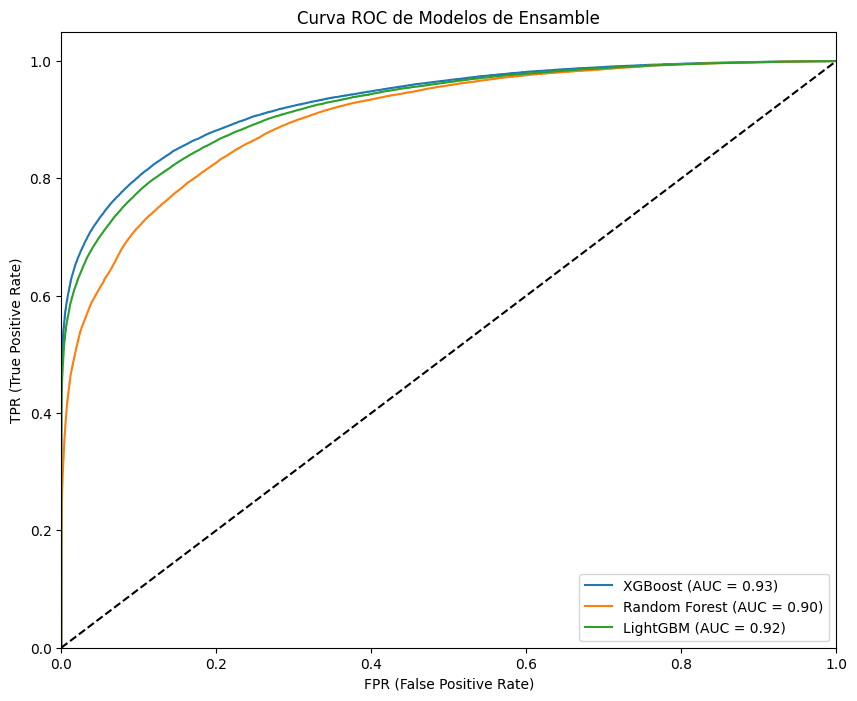

Resultados de modelos de ensamble:
          Modelo  Accuracy  Recall  F1-Score  Precision  AUC-ROC  Tiempo
0        XGBoost      0.87    0.73      0.80       0.90     0.93   15.04
2       LightGBM      0.86    0.71      0.79       0.88     0.92   13.27
1  Random Forest      0.83    0.66      0.74       0.85     0.90  608.19


In [64]:
# Evaluación de modelos de ensamble con Curvas ROC
results_ensemble = []

# Inicializa una figura para las curvas ROC
plt.figure(figsize=(10, 8))

for model_name, model in ensemble_models.items():
    print(f'Training {model_name}...')
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f'{model_name} trained in {training_time:.2f} seconds.')

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results_ensemble.append([model_name, acc, rec, f1, prec, auc_score, training_time])

    # Curva ROC
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Configuración de la gráfica ROC
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia (aleatoria)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('Curva ROC de Modelos de Ensamble')
plt.legend(loc="lower right")
plt.show()

# Resultados ordenados por F1-Score
results_ensemble_df = pd.DataFrame(results_ensemble, columns=['Modelo', 'Accuracy', 'Recall', 'F1-Score', 'Precision', 'AUC-ROC', 'Tiempo'])
print("Resultados de modelos de ensamble:")
print(results_ensemble_df.sort_values(by='F1-Score', ascending=False))


Modelos individuales

Training Neural Network...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network trained in 649.62 seconds.
Training Logistic Regression...
Logistic Regression trained in 30.94 seconds.
Training Decision Tree...
Decision Tree trained in 61.14 seconds.
Training KNN...
KNN trained in 0.71 seconds.
Resultados de modelos individuales:
                Modelo  Accuracy  Recall  F1-Score  Precision  AUC-ROC  Tiempo
0       Neural Network      0.88    0.76      0.82       0.90     0.93  649.62
3                  KNN      0.86    0.71      0.79       0.89     0.91    0.71
2        Decision Tree      0.83    0.64      0.73       0.86     0.89   61.14
1  Logistic Regression      0.77    0.54      0.64       0.77     0.83   30.94


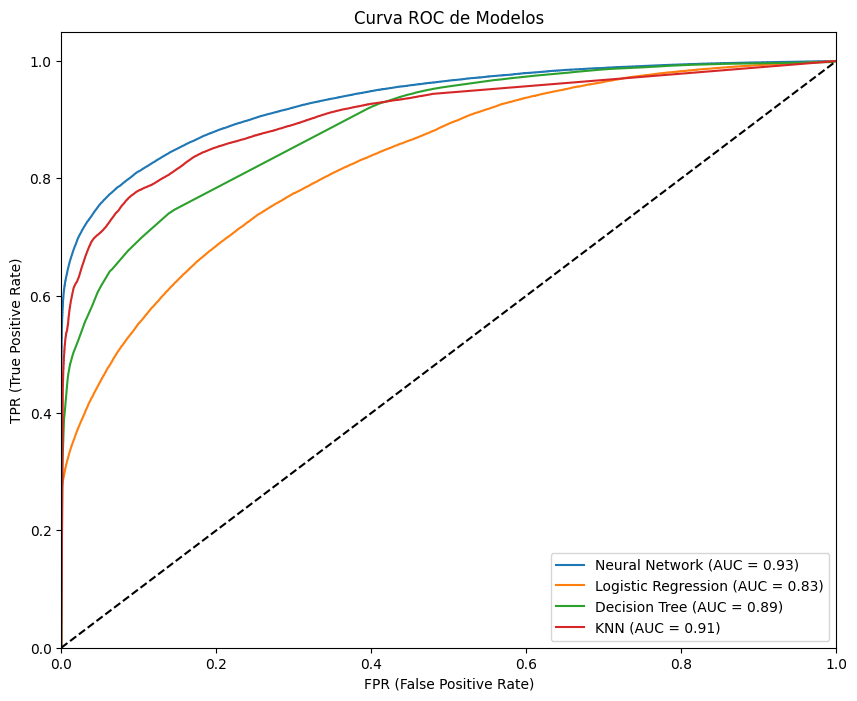

In [63]:

# Evaluación de modelos individuales

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

results_individual = []

# Inicializa una figura para las curvas ROC
plt.figure(figsize=(10, 8))

for model_name, model in individual_models.items():
    print(f'Training {model_name}...')
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f'{model_name} trained in {training_time:.2f} seconds.')

    # Predicciones
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Cálculos de métricas
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results_individual.append([model_name, acc, rec, f1, prec, auc_score, training_time])

    # Curva ROC
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Curva de entrenamiento (si el modelo tiene atributos de entrenamiento)
    if hasattr(model, 'score_samples'):
        train_scores = cross_val_score(model, X_train, y_train, cv=5)
        plt.plot(range(len(train_scores)), train_scores, label=f'{model_name} Training Score')

results_individual_df = pd.DataFrame(results_individual, columns=['Modelo', 'Accuracy', 'Recall', 'F1-Score', 'Precision', 'AUC-ROC', 'Tiempo'])
print("Resultados de modelos individuales:")
print(results_individual_df.sort_values(by='F1-Score', ascending=False))

# Configuración de la gráfica ROC
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia (aleatoria)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('Curva ROC de Modelos')
plt.legend(loc="lower right")
plt.show()



Blending para modelos individuales

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Blending - Accuracy: 0.9042458149650698
Blending - AUC-ROC: 0.9404962513440387
Blending - Recall: 0.7801094744905287
Blending - F1-Score: 0.8329045339149103
Blending - Precision: 0.89336427931797


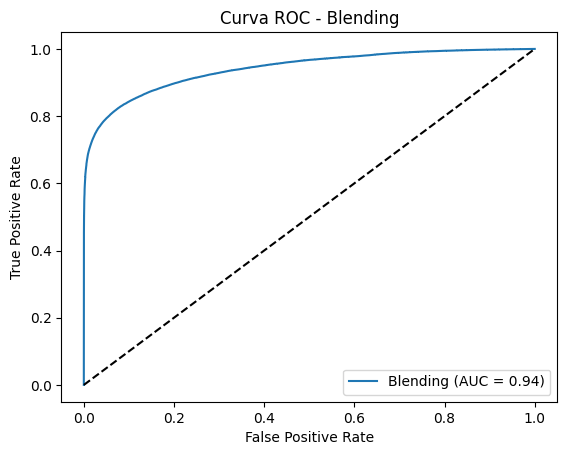

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, precision_score, roc_curve
import matplotlib.pyplot as plt

# Obtener predicciones de modelos individuales en el conjunto de entrenamiento (usando validación cruzada)
blend_train = np.column_stack([
    cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
    for model in individual_models.values()
])

# Obtener predicciones de modelos individuales en el conjunto de prueba
blend_test = np.column_stack([
    model.predict_proba(X_test)[:, 1]
    for model in individual_models.values()
])

# Entrenar el meta-modelo (Logistic Regression)
blending_model = LogisticRegression()
blending_model.fit(blend_train, y_train)

# Evaluar Blending
y_pred_blend = blending_model.predict(blend_test)
y_prob_blend = blending_model.predict_proba(blend_test)[:, 1]

# Calcular métricas
acc_blend = accuracy_score(y_test, y_pred_blend)
auc_blend = roc_auc_score(y_test, y_prob_blend)
rec_blend = recall_score(y_test, y_pred_blend)
f1_blend = f1_score(y_test, y_pred_blend)
prec_blend = precision_score(y_test, y_pred_blend)

# Imprimir resultados
print("\nBlending - Accuracy:", acc_blend)
print("Blending - AUC-ROC:", auc_blend)
print("Blending - Recall:", rec_blend)
print("Blending - F1-Score:", f1_blend)
print("Blending - Precision:", prec_blend)

# Graficar Curva ROC
fpr_blend, tpr_blend, _ = roc_curve(y_test, y_prob_blend)
plt.plot(fpr_blend, tpr_blend, label=f'Blending (AUC = {auc_blend:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Blending')
plt.legend(loc="lower right")
plt.show()


Stacking para modelos individuales

In [ ]:
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, precision_score

# ===== STACKING =====
stacking_estimators = [(name, model) for name, model in individual_models.items()]
stacking_model = StackingClassifier(estimators=stacking_estimators, final_estimator=LogisticRegression(), cv=3, n_jobs=-1)

# Entrenamiento y evaluación de Stacking
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)
y_prob_stack = stacking_model.predict_proba(X_test)[:, 1]
acc_stack = accuracy_score(y_test, y_pred_stack)
auc_stack = roc_auc_score(y_test, y_prob_stack)
rec_stack = recall_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)
prec_stack = precision_score(y_test, y_pred_stack)

print("\nStacking - Accuracy:", acc_stack)
print("Stacking - AUC-ROC:", auc_stack)
print("Stacking - Recall:", rec_stack)
print("Stacking - Precision:", prec_stack)


# Red Neuronal

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, roc_curve
from scipy.stats import uniform, randint

# Definir el modelo base sin balance de clases
mlp = MLPClassifier(random_state=42, solver='adam')

# Espacio de búsqueda reducido (usando distribuciones)
param_dist = {
    'hidden_layer_sizes': [(100, 50), (75, 50, 25)],
    'max_iter': randint(300, 600),  # Valores entre 300 y 600
    'alpha': uniform(0.0001, 0.001),  # Valores entre 0.0001 y 0.001
    'learning_rate_init': uniform(0.001, 0.005),  # Valores entre 0.001 y 0.006
    'tol': uniform(1e-5, 1e-4)  # Valores entre 1e-5 y 1e-4
}

# RandomizedSearchCV: número de iteraciones en lugar de evaluar todas las combinaciones
n_iter_search = 20  # Ajusta este valor según tu disponibilidad de tiempo

random_search = RandomizedSearchCV(mlp, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, scoring='recall',
                                   n_jobs=-1, verbose=2, random_state=42)

start_time = time.time()
random_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Mejor modelo encontrado
best_mlp = random_search.best_estimator_
print(f"Mejores hiperparámetros: {random_search.best_params_}")

# Evaluación en el conjunto de prueba
y_prob = best_mlp.predict_proba(X_test)[:, 1]

# Optimización del umbral para maximizar el recall
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Umbral óptimo encontrado: {optimal_threshold:.3f}")

# Aplicar el umbral ajustado
y_pred_opt = (y_prob >= optimal_threshold).astype(int)

# Cálculo de métricas
acc = accuracy_score(y_test, y_pred_opt)
rec = recall_score(y_test, y_pred_opt)
f1 = f1_score(y_test, y_pred_opt)
prec = precision_score(y_test, y_pred_opt)
auc_score = roc_auc_score(y_test, y_prob)

print("\nResultados del mejor modelo:")
print(f"Accuracy: {acc:.4f}")
print(f"Recall: {rec:.4f}  <-- 🔥 Maximizado")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"AUC-ROC: {auc_score:.4f}")
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")

# Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Neural Network')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import joblib

# Guardar el modelo
joblib.dump(best_mlp, "mlp_model_mlp_inicial.pkl")

# Para cargarlo más tarde:
# best_mlp = joblib.load("mlp_model.pkl")

In [ ]:
# Red neuronal haciendo ajuste para incorporar "early stopping"
# y reducir el número de iteraciones de la búsqueda aleatoria para disminuir el tiempo de cómputo,

import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, roc_curve
from scipy.stats import uniform, randint

# Definir el modelo base sin balance de clases, activando early stopping para ahorrar tiempo
mlp = MLPClassifier(random_state=42, solver='adam', early_stopping=True,
                    validation_fraction=0.1, n_iter_no_change=10)

# Espacio de búsqueda reducido (usando distribuciones) para disminuir el número de combinaciones
param_dist = {
    'hidden_layer_sizes': [(100, 50), (75, 50, 25)],
    'max_iter': randint(300, 500),            # Usar un rango más bajo para reducir tiempo
    'alpha': uniform(0.0001, 0.001),            # Valores entre 0.0001 y 0.001
    'learning_rate_init': uniform(0.001, 0.005),  # Valores entre 0.001 y 0.006
    'tol': uniform(1e-5, 1e-4)                  # Valores entre 1e-5 y 1e-4
}

# RandomizedSearchCV: reducir el número de iteraciones para ahorrar tiempo
n_iter_search = 10  # Disminuido de 20 a 10

random_search = RandomizedSearchCV(mlp, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, scoring='recall',
                                   n_jobs=-1, verbose=2, random_state=42)

start_time = time.time()
random_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Mejor modelo encontrado
best_mlp = random_search.best_estimator_
print(f"Mejores hiperparámetros: {random_search.best_params_}")

# Evaluación en el conjunto de prueba
y_prob = best_mlp.predict_proba(X_test)[:, 1]

# Optimización del umbral para maximizar el recall
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_idx = np.argmax(tpr - fpr)  # Índice donde (TPR - FPR) es mayor
optimal_threshold = thresholds[optimal_idx]
print(f"Umbral óptimo encontrado: {optimal_threshold:.3f}")

# Aplicar el umbral ajustado
y_pred_opt = (y_prob >= optimal_threshold).astype(int)

# Cálculo de métricas
acc = accuracy_score(y_test, y_pred_opt)
rec = recall_score(y_test, y_pred_opt)
f1 = f1_score(y_test, y_pred_opt)
prec = precision_score(y_test, y_pred_opt)
auc_score = roc_auc_score(y_test, y_prob)

print("\nResultados del mejor modelo:")
print(f"Accuracy: {acc:.4f}")
print(f"Recall: {rec:.4f}  <-- 🔥 Maximizado con Early stopping")
print(f"F1-Score: {f1:.4f}")
print(f"Precision: {prec:.4f}")
print(f"AUC-ROC: {auc_score:.4f}")
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Neural Network')
plt.legend(loc="lower right")
plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
import joblib

# Guardar el modelo
joblib.dump(best_mlp, "mlp_model_mlp_early_stop.pkl")

# Para cargarlo más tarde:
# best_mlp = joblib.load("mlp_model.pkl")

## Con PCA

In [ ]:
# Aplicar PCA
pca = PCA(n_components=0.95)  # Mantiene el 95% de la varianza explicada
pca_transformed = pca.fit_transform(df_transformed)

# Convertir resultado de PCA a DataFrame
df_pca = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])])

# Mostrar varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(explained_variance)

# Mostrar el DataFrame transformado con PCA
print("\nDataFrame final con PCA aplicado:")
print(df_pca.head())

Varianza explicada por cada componente principal:
[0.2011027  0.0767406  0.07002702 0.06248906 0.05703677 0.04697697
 0.04602498 0.03971706 0.03533357 0.02719103 0.0264861  0.02477869
 0.02353916 0.02205914 0.02087443 0.01879983 0.01761537 0.01591847
 0.01512558 0.01495451 0.01446402 0.01375887 0.01334865 0.0080088
 0.007514   0.0069948  0.00558775 0.00524551 0.00463339 0.00416809
 0.00328994 0.0031564 ]

DataFrame final con PCA aplicado:
    PC1   PC2   PC3    PC4   PC5   PC6   PC7   PC8   PC9  PC10  ...  PC23  \
0 -0.45  3.26  2.05  -3.80 -1.15  0.22  1.01 -0.35  0.39  0.35  ...  0.89   
1  6.17  6.96 23.93 -14.52  8.04 -6.10 43.55  1.14  0.52 -3.10  ... -1.15   
2 -2.83 -1.99  9.11  -8.54  0.69 -2.05 14.54 -1.41 -2.49 -0.56  ... -0.02   
3  5.03  2.03  4.85  -3.21 -0.34 -1.27  8.74  0.17  0.71 -1.88  ...  0.27   
4  6.48  8.44 27.65 -18.38  9.28 -7.75 58.11  2.11 -0.10 -4.59  ... -3.03   

   PC24  PC25  PC26  PC27  PC28  PC29  PC30  PC31  PC32  
0  0.51 -0.33 -0.17 -0.23 -0.82 -0.2

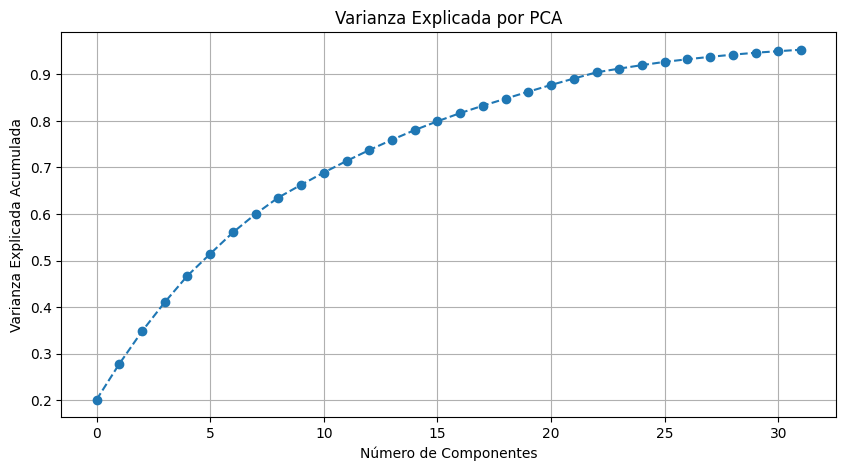

In [ ]:

# Obtener la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(explained_variance)

# Graficar la varianza acumulada
plt.figure(figsize=(10,5))
plt.plot(varianza_acumulada, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por PCA')
plt.grid()
plt.show()


In [ ]:
# Ver las cargas de las componentes principales
loadings = pca.components_

# Obtener los nombres de las variables originales después de One-Hot Encoding
# Para las variables categóricas codificadas
variables_originales = num_cols + list(encoder.get_feature_names_out(cat_cols))

# Crear un DataFrame de las cargas de las componentes principales y las variables
loadings_df = pd.DataFrame(loadings, columns=variables_originales)

# Mostrar el DataFrame con las cargas
print("Cargas de las Componentes Principales:")
print(loadings_df)

# Si deseas ver la contribución de cada variable a cada componente de forma ordenada
for i in range(loadings_df.shape[0]):  # Para cada componente
    print(f"\nComponent {i+1}:")
    print(loadings_df.iloc[i].sort_values(ascending=False))  # Ordena las cargas por importancia

Cargas de las Componentes Principales:
    tasa_creds_3m  tasa_em_creds_3m  em_porc_pen  em_empl_saldcredt_prom_3m  \
0            0.00              0.01         0.02                       0.02   
1            0.05              0.05         0.06                       0.07   
2            0.19              0.29         0.28                       0.26   
3           -0.07             -0.07        -0.10                      -0.11   
4            0.12              0.19         0.18                       0.16   
5           -0.04             -0.03        -0.04                      -0.04   
6           -0.06             -0.19        -0.10                      -0.08   
7           -0.05             -0.02        -0.03                      -0.03   
8           -0.03             -0.00        -0.03                      -0.03   
9            0.04              0.10         0.05                       0.04   
10          -0.03              0.01        -0.03                      -0.04   
11           

In [ ]:
# Agregar comentarios

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



In [ ]:
# Obtener la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(explained_variance)
varianza_acumulada

array([0.2011027 , 0.2778433 , 0.34787032, 0.41035938, 0.46739615,
       0.51437311, 0.5603981 , 0.60011516, 0.63544873, 0.66263977,
       0.68912587, 0.71390456, 0.73744371, 0.75950285, 0.78037729,
       0.79917711, 0.81679249, 0.83271096, 0.84783654, 0.86279105,
       0.87725507, 0.89101394, 0.9043626 , 0.9123714 , 0.91988539,
       0.92688019, 0.93246794, 0.93771345, 0.94234685, 0.94651494,
       0.94980488, 0.95296128])

In [ ]:

# Número mínimo de componentes que explican el 95% de la varianza
num_componentes_optimos = np.argmax(varianza_acumulada >= 0.95) + 1
print(f"Número óptimo de componentes: {num_componentes_optimos}")


Número óptimo de componentes: 32


In [ ]:

# Reducir el DataFrame a las componentes óptimas
df_pca_opt = df_pca.iloc[:, :num_componentes_optimos]
df_pca_opt.head()

PC1   PC2   PC3    PC4   PC5   PC6   PC7   PC8   PC9  PC10  ...  PC23  \
0 -0.45  3.26  2.05  -3.80 -1.15  0.22  1.01 -0.35  0.39  0.35  ...  0.89   
1  6.17  6.96 23.93 -14.52  8.04 -6.10 43.55  1.14  0.52 -3.10  ... -1.15   
2 -2.83 -1.99  9.11  -8.54  0.69 -2.05 14.54 -1.41 -2.49 -0.56  ... -0.02   
3  5.03  2.03  4.85  -3.21 -0.34 -1.27  8.74  0.17  0.71 -1.88  ...  0.27   
4  6.48  8.44 27.65 -18.38  9.28 -7.75 58.11  2.11 -0.10 -4.59  ... -3.03   

   PC24  PC25  PC26  PC27  PC28  PC29  PC30  PC31  PC32  
0  0.51 -0.33 -0.17 -0.23 -0.82 -0.20  0.45 -0.66  0.26  
1  0.48 -0.97  4.14 -1.59  0.29 -0.23  0.55  0.35  0.32  
2 -0.18 -0.36  0.56 -1.03 -0.09  0.08 -0.08 -0.65 -0.11  
3 -0.14 -0.81  0.87 -0.47  0.32 -0.13  0.38 -0.51  1.06  
4  0.42 -0.85  2.97 -0.72  0.23 -0.24  0.47  0.29 -0.09  

[5 rows x 32 columns]

In [ ]:

# Definir la variable objetivo y las características
X = df_pca_opt  # Variables después de reducción con PCA
y = datos_df['target']  # Target original



In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:
# Manejar el desbalanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)



Entrenando LogisticRegression...
Accuracy del modelo LogisticRegression: 0.9574061107379879

Entrenando RandomForest...


KeyboardInterrupt: 

In [ ]:
# Entrenar modelo de Regresión Logística
model = LogisticRegression(random_state=42)
model.fit(X_train_res, y_train_res)


LogisticRegression(random_state=42)

In [ ]:

# Predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [ ]:
# Evaluación del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Matriz de confusión:
[[861016 545898]
 [ 16321  46342]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.61      0.75   1406914
           1       0.08      0.74      0.14     62663

    accuracy                           0.62   1469577
   macro avg       0.53      0.68      0.45   1469577
weighted avg       0.94      0.62      0.73   1469577

ROC AUC Score: 0.738907554367416


In [ ]:
from sklearn.metrics import accuracy_score
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')


Accuracy del modelo: 0.6174280081955555


In [ ]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier


#from sklearn.svm import SVC
#import xgboost as xgb
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import accuracy_score

# Crear un diccionario de modelos
#modelos = {
#    'LogisticRegression': LogisticRegression(random_state=42),
#    'RandomForest': RandomForestClassifier(random_state=42),
#    'SVM': SVC(random_state=42),
#    'XGBoost': xgb.XGBClassifier(random_state=42),
#    'KNN': KNeighborsClassifier(),
#    'DecisionTree': DecisionTreeClassifier(random_state=42),
#    'NaiveBayes': GaussianNB()
#}

# Ciclo para entrenar y evaluar todos los modelos
#for nombre_modelo, modelo in modelos.items():
#    print(f"Entrenando {nombre_modelo}...")

    # Entrenar el modelo
#    modelo.fit(X_train, y_train)

    # Hacer predicciones
#    y_pred = modelo.predict(X_test)

    # Evaluar el modelo
#    accuracy = accuracy_score(y_test, y_pred)

    # Imprimir los resultados
#    print(f'Accuracy del modelo {nombre_modelo}: {accuracy}\n')

Deben hacer un análisis de la métrica relevante. ¿Qué es más costoso para el negocio? Los falsos positivos o los negativos? Si son los primeros, hay que considerar la precisión, si son los negativos, la métrica más importante sería el recall.

1️⃣ Recall para la clase 1 (pérdida de empleo)
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
=
51
,
853
51
,
853
+
10
,
520
=
0.83
Recall=
TP+FN
TP
​
 =
51,853+10,520
51,853
​
 =0.83
🔹 ✅ Excelente Recall (83%) → El modelo está capturando el 83% de los casos reales de pérdida de empleo, lo cual es bueno para tu objetivo.

2️⃣ Precisión para la clase 1
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
=
51
,
853
51
,
853
+
344
,
570
=
0.13
Precision=
TP+FP
TP
​
 =
51,853+344,570
51,853
​
 =0.13
🔸 ❌ Baja Precisión (13%) → Muchos falsos positivos, lo que significa que hay muchas falsas alertas.

3️⃣ F1-score
𝐹
1
=
2
×
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
×
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
+
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
=
2
×
0.13
×
0.83
0.13
+
0.83
=
0.23
F1=2×
Precision+Recall
Precision×Recall
​
 =2×
0.13+0.83
0.13×0.83
​
 =0.23
🔹 Bajo F1-score (23%), pero como el recall es alto, el modelo cumple con la prioridad de minimizar falsos negativos.

4️⃣ ROC AUC Score
Un AUC de ROC alto sugiere que el modelo es bueno separando ambas clases. No lo has mencionado, pero si está por encima de 0.75 o 0.80, es aceptable.

🔹 Conclusión
✅ El modelo es bueno para el objetivo de minimizar falsos negativos porque:

Captura el 83% de los casos reales de pérdida de empleo (recall = 0.83).
Aunque tiene una precisión baja (13%), eso es aceptable en este caso, ya que es mejor tener falsos positivos que falsos negativos.
La matriz de confusión indica que el modelo identifica correctamente la mayoría de los empleados en riesgo.
🔸 ¿Cómo mejorarlo?
Si quieres reducir los falsos positivos sin sacrificar mucho recall, podrías:

Ajustar el umbral de decisión (por ejemplo, probar con 0.4 en lugar de 0.5).
Probar técnicas de balanceo de clases (como SMOTE o ajuste de class_weight en modelos como Random Forest o XGBoost).
Utilizar modelos más sofisticados como XGBoost o LightGBM para mejorar la separación entre clases.
📌 ¿Quieres que ajustemos el umbral para encontrar el punto óptimo entre precisión y recall? 🚀

Recomiendo utilizar la curva de aprendizaje que les proporciona una visualización clara del comportamiento del modelo en función del tamaño del conjunto de entrenamiento. Si la diferencia entre las puntuaciones de entrenamiento y validación es pequeña (menos del 5), indica que el modelo generaliza bien. Una diferencia del 20% o más entre el conjunto de entrenamiento y el conjunto de validación puede considerarse significativa y generalmente indica sobreajuste.